# <div style="text-align: center;">Hausse du prix de l'immobilier et les LGV de la SNCF </div>

*Auteurs :*
- Mats BEREDS
- Amadou DIOUF

# Introduction
Ce notebook a pour projet d'étudier la variation du prix du m2 à Bordeaux depuis l'implantation de la ligne LGV, finalisé en juillet 2017. Cette ligne prolonge la ligne LGV Atlantique, et permet de réduire le temps de trajet de près de 1/3. Aujourd'hui, la perle d'Aquitaine est a 2h de la capitale. Or, selon une étude réalisé par Bill Hillier (chercheur à la *University College of London*) dans les années 1980, l'accessibilité d'une ville par rapport à "l'archipel mégalopolitain mondial" (Dollfus) induit nécessairement une revalorisation économique de l'espace. Ainsi, nous tenterons d'étudier ici l'influence ou non qu'a eu cette nouvelle ligne LGV sur les prix de l'immobilier.
Un premier temps d'étude sera consacré à la fréquentation des lignes Paris-Bordeaux. ela nous permettra d'établir si les échanges de personnes ont effectivement augmenté entre Bordeaux et Paris. Ensuite nous analyserons l'évolution du prix du m² entre 2015 et 2019 à partir des données DVF. Enfin, nous tenterons de modéliser par une régression linéaire le prix du m² dans le centre-ville.

# I) Etude de la fréquentation des lignes Paris-Bordeaux


In [3]:
# Packages utilisés
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import requests
import geopandas as gpd
import descartes

## a) Étude de la ligne Paris Montparnasse vers Bordeaux Saint-Jean

In [2]:
# Chargement et nettoyage données Paris -> Bordeaux
parisbordeaux = pd.read_csv('https://raw.githubusercontent.com/mdlbm/SNCF-Immobilier/Mats/parisbordeaux.csv')
# Tri des données de circulation par période
parisbordeaux = parisbordeaux.sort_values(['Période'])
parisbordeaux['Nombre de circulations effectives'] = (parisbordeaux['Nombre de circulations prévues'])-(parisbordeaux['Nombre de trains annulés']) #Création de la varaible nombre de circulations effectives
parisbordeaux['Service'] = parisbordeaux['Service'].replace(np.nan,'LGV') # Remplacement des valeurs NaN par la valeur LGV
parisbordeaux.sample(7)

,Année,Mois,Service,Gare de départ,Gare d'arrivée,Durée moyenne du trajet (min),Nombre de circulations prévues,Nombre de trains annulés,Nombre de trains en retard au départ,Retard moyen des trains en retard au départ (min),Retard moyen de tous les trains au départ (min),Nombre de trains en retard à l'arrivée,Retard moyen des trains en retard à l'arrivée (min),Retard moyen de tous les trains à l'arrivée (min),Période,Nombre de circulations effectives
3,2015,2.0,National,PARIS MONTPARNASSE,BORDEAUX ST JEAN,210.177083,577.0,1.0,22.0,19.772727,0.949653,44.0,30.772727,4.307292,2015-02,576.0
46,2016,1.0,National,PARIS MONTPARNASSE,BORDEAUX ST JEAN,207.832155,566.0,1.0,23.0,15.956522,0.782686,45.0,42.400000,5.614841,2016-01,565.0
28,2016,11.0,National,PARIS MONTPARNASSE,BORDEAUX ST JEAN,211.294686,622.0,1.0,54.0,22.777778,2.241546,105.0,39.761905,11.028986,2016-11,621.0
62,2020,1.0,LGV,PARIS MONTPARNASSE,BORDEAUX ST JEAN,147.515845,616.0,48.0,435.0,3.494674,2.560035,146.0,24.870662,8.833216,2020-01,568.0
60,2019,12.0,LGV,PARIS MONTPARNASSE,BORDEAUX ST JEAN,146.394649,366.0,67.0,232.0,7.810345,5.910201,82.0,24.770528,7.569565,2019-12,299.0
26,2019,5.0,LGV,PARIS MONTPARNASSE,BORDEAUX ST JEAN,146.948363,794.0,0.0,467.0,10.548787,5.974853,32.0,26.047917,0.162133,2019-05,794.0
5,2016,12.0,National,PARIS MONTPARNASSE,BORDEAUX ST JEAN,206.159190,697.0,6.0,56.0,26.499702,2.126556,198.0,31.188805,12.050314,2016-12,691.0


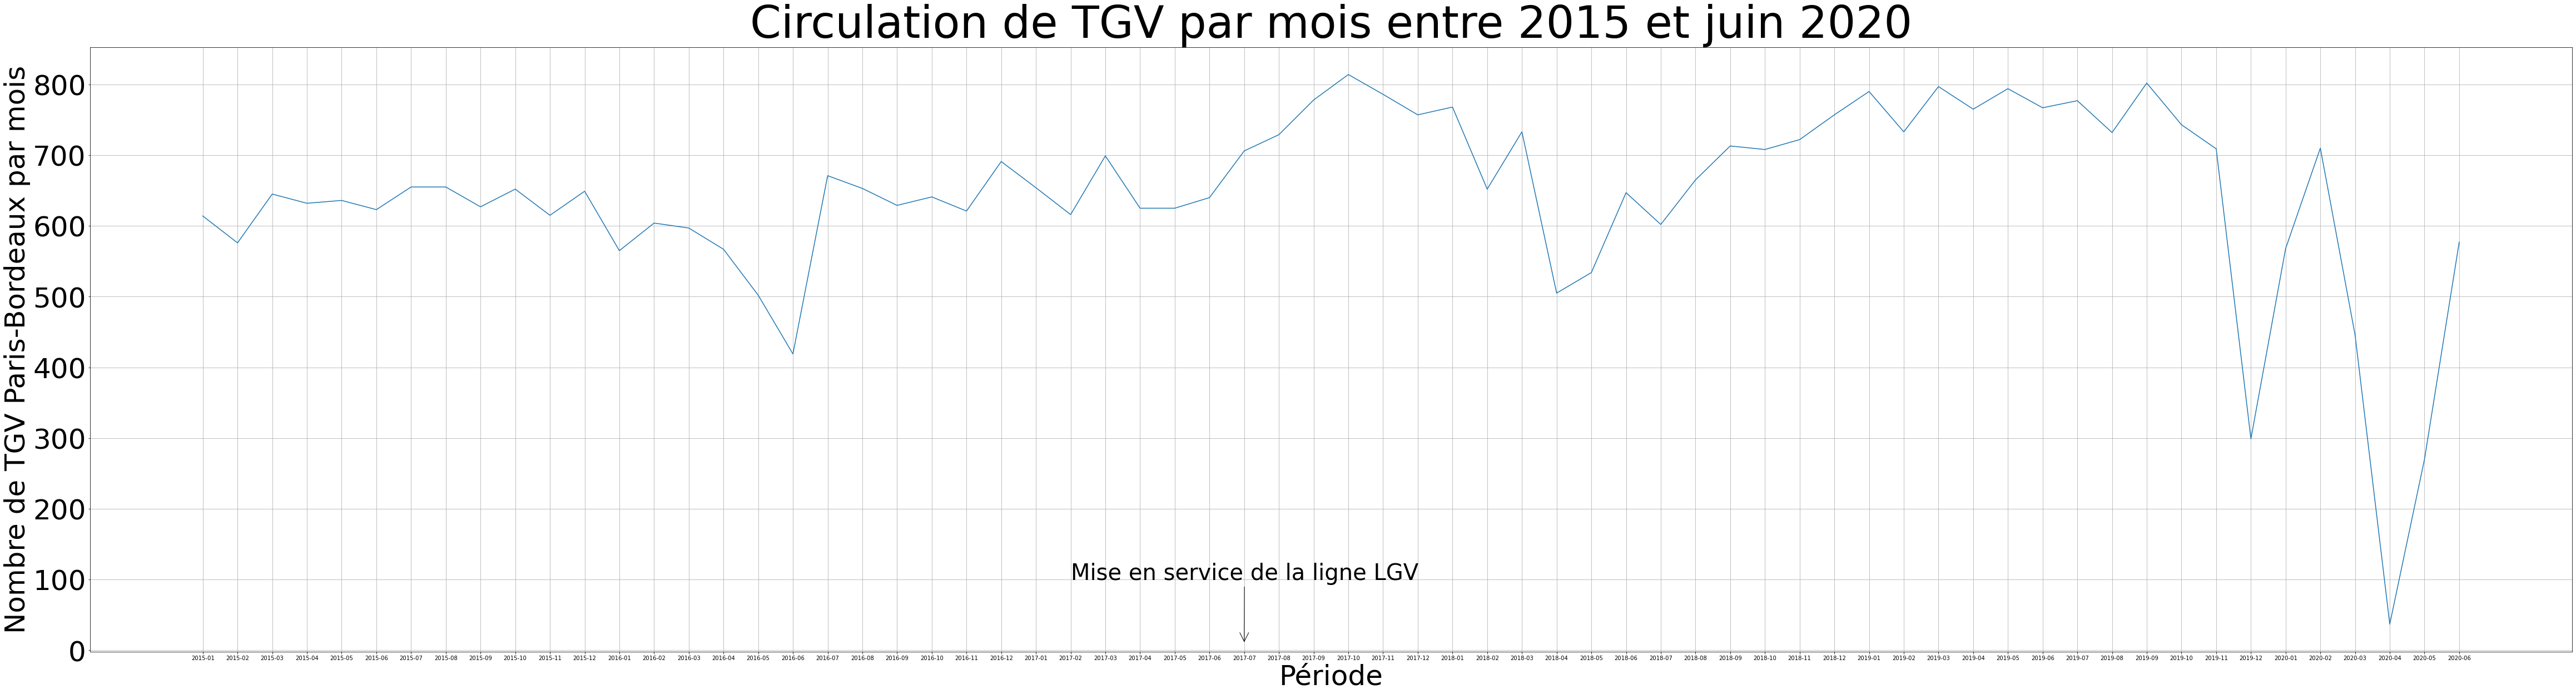

In [3]:
# Circulation de TGV par mois entre 2015 et juin 2020
plt.figure(figsize=(80,20))
plt.plot(parisbordeaux['Période'],parisbordeaux['Nombre de circulations effectives'])
plt.title('Circulation de TGV par mois entre 2015 et juin 2020',size = 80)
plt.xlabel('Période', size = 50)
plt.ylabel('Nombre de TGV Paris-Bordeaux par mois', size = 50)
plt.grid() 

plt.yticks(size = 50)
plt.annotate('Mise en service de la ligne LGV', xy=(30, 10),
xytext=(25,100),
arrowprops=dict(facecolor='black',
arrowstyle='->'), size=40)
plt.show()

<ipython-input-4-395541558c6a>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  moyenne_circulation_service = [parisbordeaux[parisbordeaux['Service']=='National']['Nombre de circulations effectives'].mean(),parisbordeaux[parisbordeaux['Service']=='LGV'][parisbordeaux['Période']<'2019-09']['Nombre de circulations effectives'].mean()]


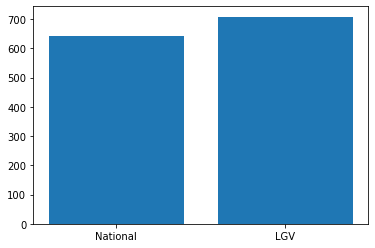

In [4]:
# Nombre de circulations effective
moyenne_circulation_service = [parisbordeaux[parisbordeaux['Service']=='National']['Nombre de circulations effectives'].mean(),parisbordeaux[parisbordeaux['Service']=='LGV'][parisbordeaux['Période']<'2019-09']['Nombre de circulations effectives'].mean()]
plt.bar(['National','LGV'],moyenne_circulation_service)
plt.show()

En prenant soin d'enlever les données que la crise sanitaire pouvait altérer, on voit donc que la ligne LGV a fait augmenter le nombre de trajet moyen par mois d'environ 65.

<Figure size 432x288 with 0 Axes>

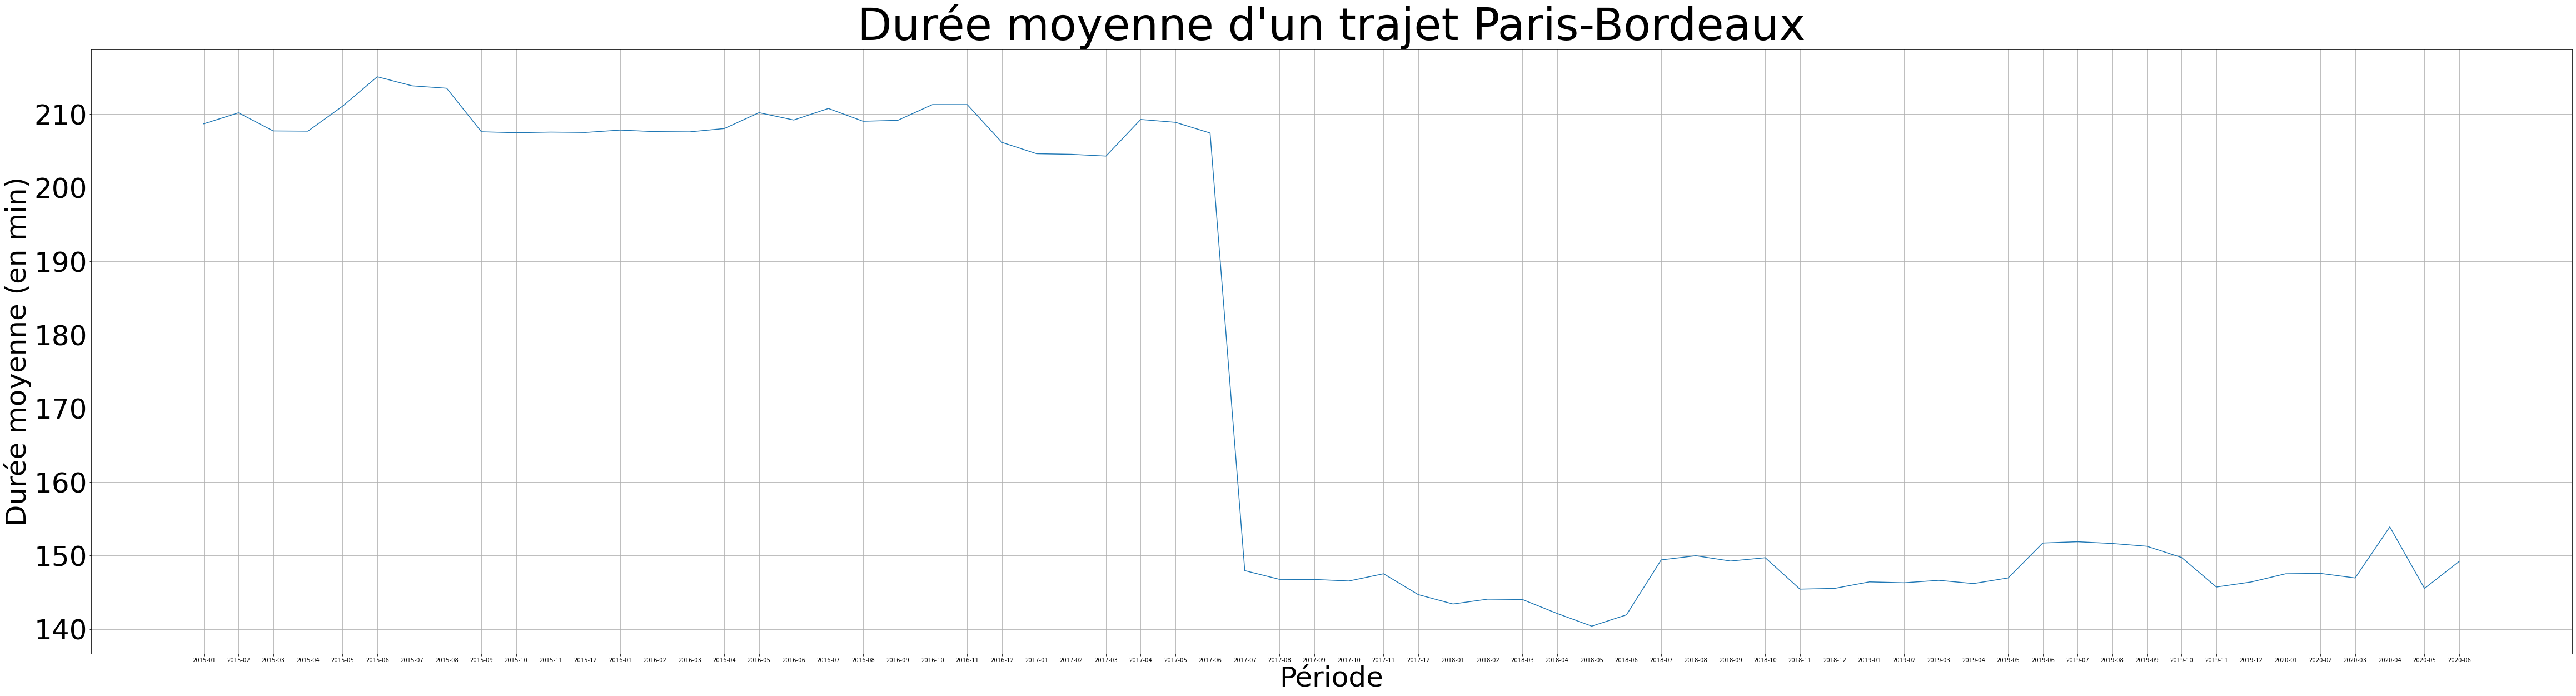

In [5]:
# Durée moyenne d'un trajet Paris-Bordeaux
plt.clf()
plt.figure(figsize=(80,20))
plt.plot(parisbordeaux['Période'],parisbordeaux['Durée moyenne du trajet (min)'])
plt.title("Durée moyenne d'un trajet Paris-Bordeaux",size = 80)
plt.xlabel('Période', size = 50)
plt.ylabel('Durée moyenne (en min)', size = 50)
plt.yticks(size = 50)
plt.grid()

Le temps de trajet moyen est donc tomber de 210 min  (3h30) à 150 min (2h30). Il est intéressant de rappeler ici que beaucoup de trajet de Paris (la moitié)  vers Bordeaux passe par d'autres gares comme Massy Palaiseau; Libourne, Angoulême ou encore Poitiers, ce qui rallonge le temps de trajet d'une heure. 

## b) Étude de la ligne Bordeaux Saint-Jean vers Paris Montparnasse

In [6]:
# Chargement et nettoyage données Bordeaux -> Paris
bordeauxparis = pd.read_csv('https://raw.githubusercontent.com/mdlbm/SNCF-Immobilier/Mats/bordeauxparis.csv')
bordeauxparis = bordeauxparis.sort_values(['Période'])
bordeauxparis['Nombre de circulations effectives'] = (bordeauxparis['Nombre de circulations prévues'])-(bordeauxparis['Nombre de trains annulés']) #Création de la varaible nombre de circulations effectives
bordeauxparis['Service'] = bordeauxparis['Service'].replace(np.nan,'LGV') # Remplacement des valeurs NaN par la valeur LGV
bordeauxparis.sample(7)

,Année,Mois,Service,Gare de départ,Gare d'arrivée,Durée moyenne du trajet (min),Nombre de circulations prévues,Nombre de trains annulés,Nombre de trains en retard au départ,Retard moyen des trains en retard au départ (min),Retard moyen de tous les trains au départ (min),Nombre de trains en retard à l'arrivée,Retard moyen des trains en retard à l'arrivée (min),Retard moyen de tous les trains à l'arrivée (min),Période,Nombre de circulations effectives
6,2018,8.0,LGV,BORDEAUX ST JEAN,PARIS MONTPARNASSE,146.402490,738.0,15.0,296.0,7.827140,3.119433,114.0,27.595322,5.986215,2018-08,723.0
21,2017,12.0,National,BORDEAUX ST JEAN,PARIS MONTPARNASSE,140.289346,876.0,50.0,154.0,20.849242,4.253148,175.0,31.573714,8.462752,2017-12,826.0
17,2016,3.0,National,BORDEAUX ST JEAN,PARIS MONTPARNASSE,208.433948,651.0,26.0,72.0,12.805556,2.010753,66.0,39.909091,4.921659,2016-03,625.0
9,2017,2.0,National,BORDEAUX ST JEAN,PARIS MONTPARNASSE,205.603077,658.0,8.0,85.0,23.473137,3.320615,98.0,44.860034,7.332718,2017-02,650.0
44,2015,5.0,National,BORDEAUX ST JEAN,PARIS MONTPARNASSE,211.434389,663.0,0.0,121.0,14.140496,3.285068,39.0,38.358974,1.941176,2015-05,663.0
5,2017,10.0,National,BORDEAUX ST JEAN,PARIS MONTPARNASSE,143.052934,871.0,2.0,114.0,16.699708,1.634618,107.0,24.794548,4.337188,2017-10,869.0
2,2019,5.0,LGV,BORDEAUX ST JEAN,PARIS MONTPARNASSE,143.317967,858.0,12.0,277.0,3.332491,0.825059,51.0,22.272549,2.346237,2019-05,846.0


<Figure size 432x288 with 0 Axes>

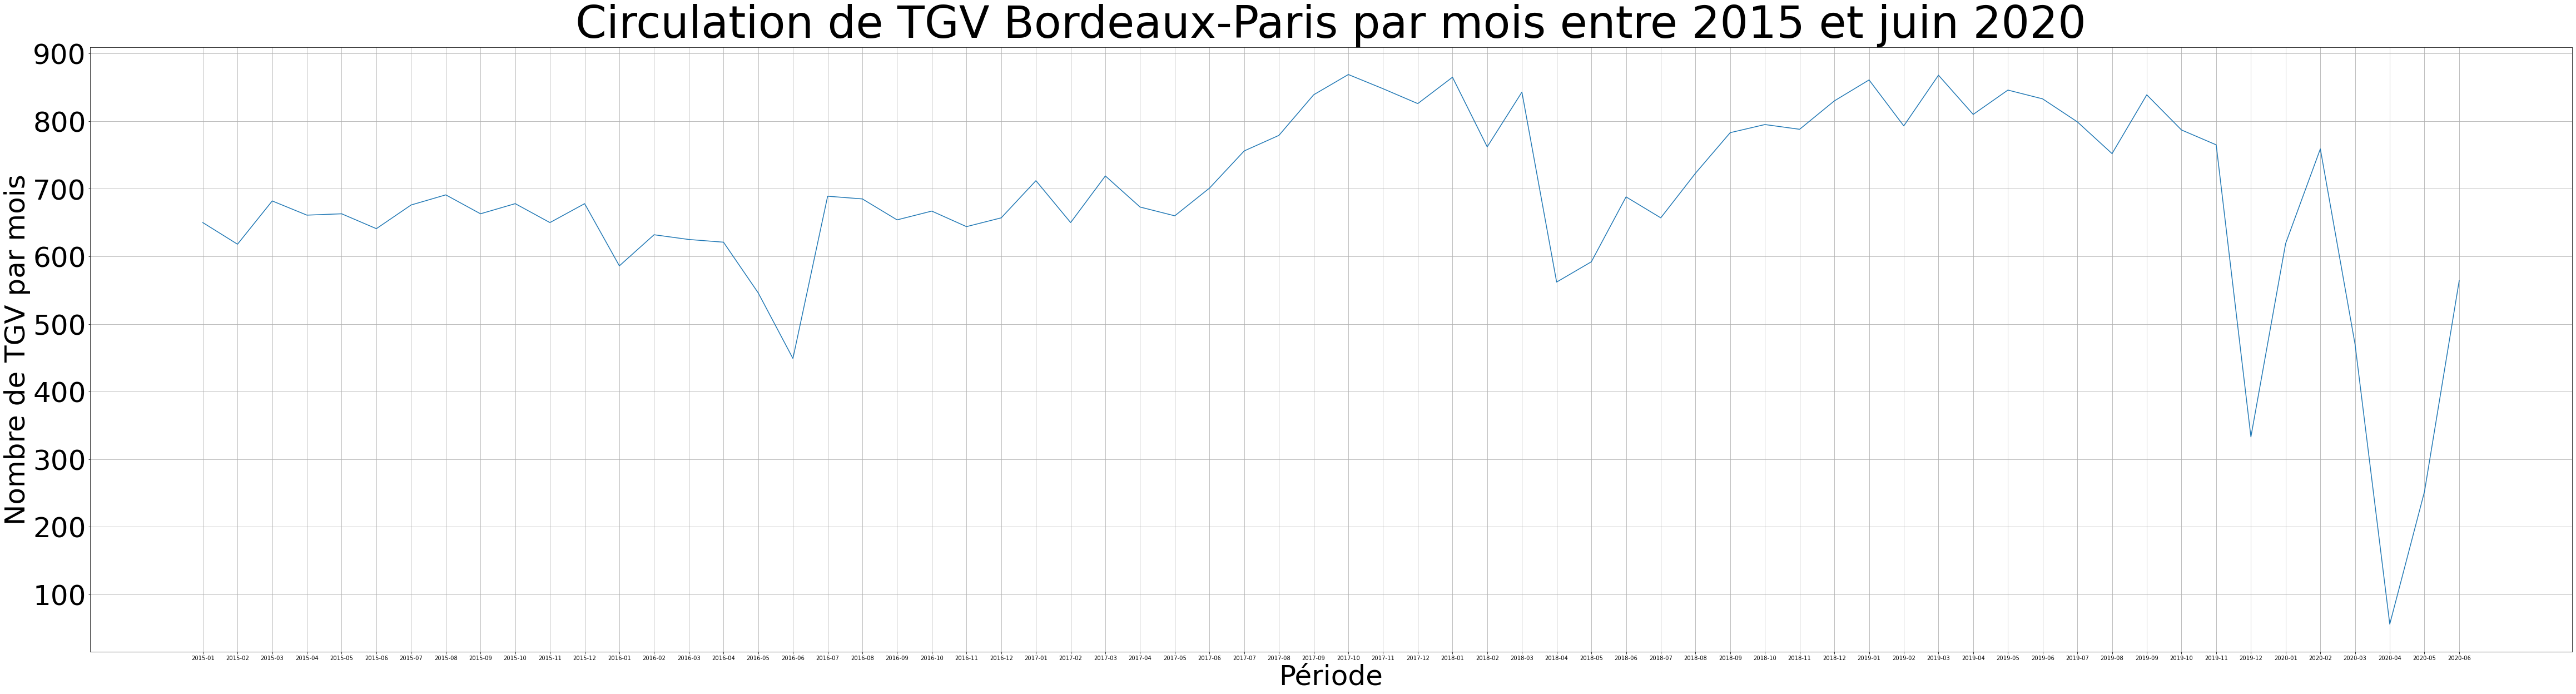

In [7]:
plt.clf() 
 
plt.figure(figsize=(80,20))
plt.plot(bordeauxparis['Période'],bordeauxparis['Nombre de circulations effectives'])
plt.title('Circulation de TGV Bordeaux-Paris par mois entre 2015 et juin 2020',size = 80)
plt.xlabel('Période', size = 50)
plt.ylabel('Nombre de TGV par mois', size = 50)
plt.grid() 

plt.yticks(size = 50)
plt.annotate('Mise en service de la ligne LGV', xy=(30, 10),xytext=(25,100),arrowprops=dict(facecolor='black',arrowstyle='->'), size=40)
plt.show()

<ipython-input-8-852ac74f41c7>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  moyenne_circulation_service_bordeauxparis = [bordeauxparis[bordeauxparis['Service']=='National']['Nombre de circulations effectives'].mean(),bordeauxparis[bordeauxparis['Service']=='LGV'][bordeauxparis['Période']<'2019-09']['Nombre de circulations effectives'].mean()]


[678.8333333333334, 772.5]

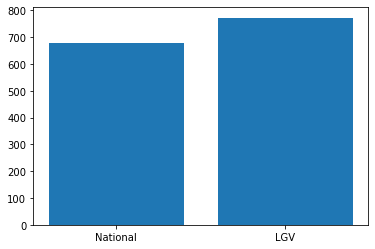

In [8]:
moyenne_circulation_service_bordeauxparis = [bordeauxparis[bordeauxparis['Service']=='National']['Nombre de circulations effectives'].mean(),bordeauxparis[bordeauxparis['Service']=='LGV'][bordeauxparis['Période']<'2019-09']['Nombre de circulations effectives'].mean()]
plt.bar(['National','LGV'],moyenne_circulation_service_bordeauxparis)
moyenne_circulation_service_bordeauxparis

En prenant soin d'enlever les données que la crise sanitaire pouvait altérer, on voit donc que la ligne LGV a fait augmenter le nombre de trajet moyen par mois d'environ 94.

<Figure size 432x288 with 0 Axes>

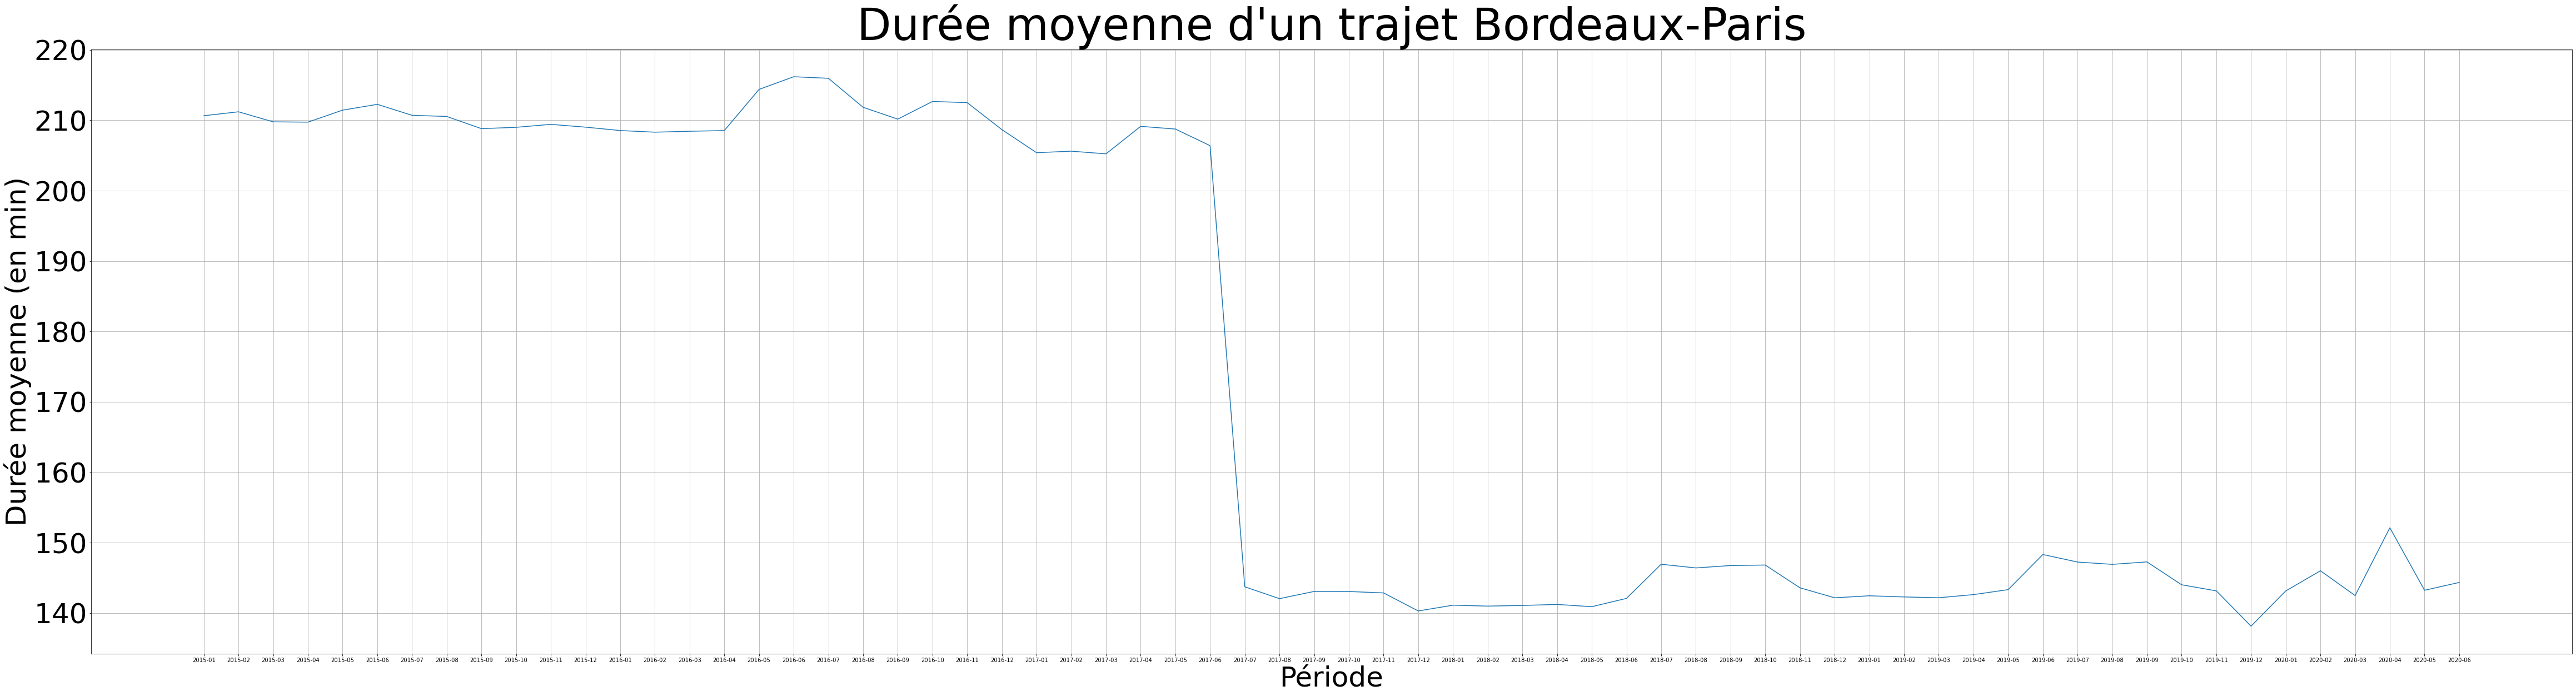

In [9]:
# Durée moyenne d'un trajet Bordeaux-Paris
plt.clf()
plt.figure(figsize=(80,20))
plt.plot(bordeauxparis['Période'],bordeauxparis['Durée moyenne du trajet (min)'])
plt.title("Durée moyenne d'un trajet Bordeaux-Paris",size = 80)
plt.xlabel('Période', size = 50)
plt.ylabel('Durée moyenne (en min)', size = 50)
plt.yticks(size = 50)
plt.grid()

Même remarque que dans a)

## c) Étude de la fréquentation en gare

Cela nous permettra de déterminer l'augmentation du nombre d'utilisateurs de la ligne.


In [10]:
# Chargement données fréquentations
frequentation_paris_bordeaux=pd.read_csv('https://raw.githubusercontent.com/mdlbm/SNCF-Immobilier/Mats/frequentation-paris-bordeaux.csv', sep=';')
frequentation_paris_bordeaux = frequentation_paris_bordeaux.sort_index(axis=1 ,ascending=True)
frequentation_paris_bordeaux

,Nom de la gare,Total Voyageurs 2015,Total Voyageurs 2016,Total Voyageurs 2017,Total Voyageurs 2018,Total Voyageurs 2019
0,Bordeaux Saint-Jean,12062338,12198403,14979299,16080989,17675655
1,Paris Montparnasse,55167519,55162747,57752741,59174531,61374035


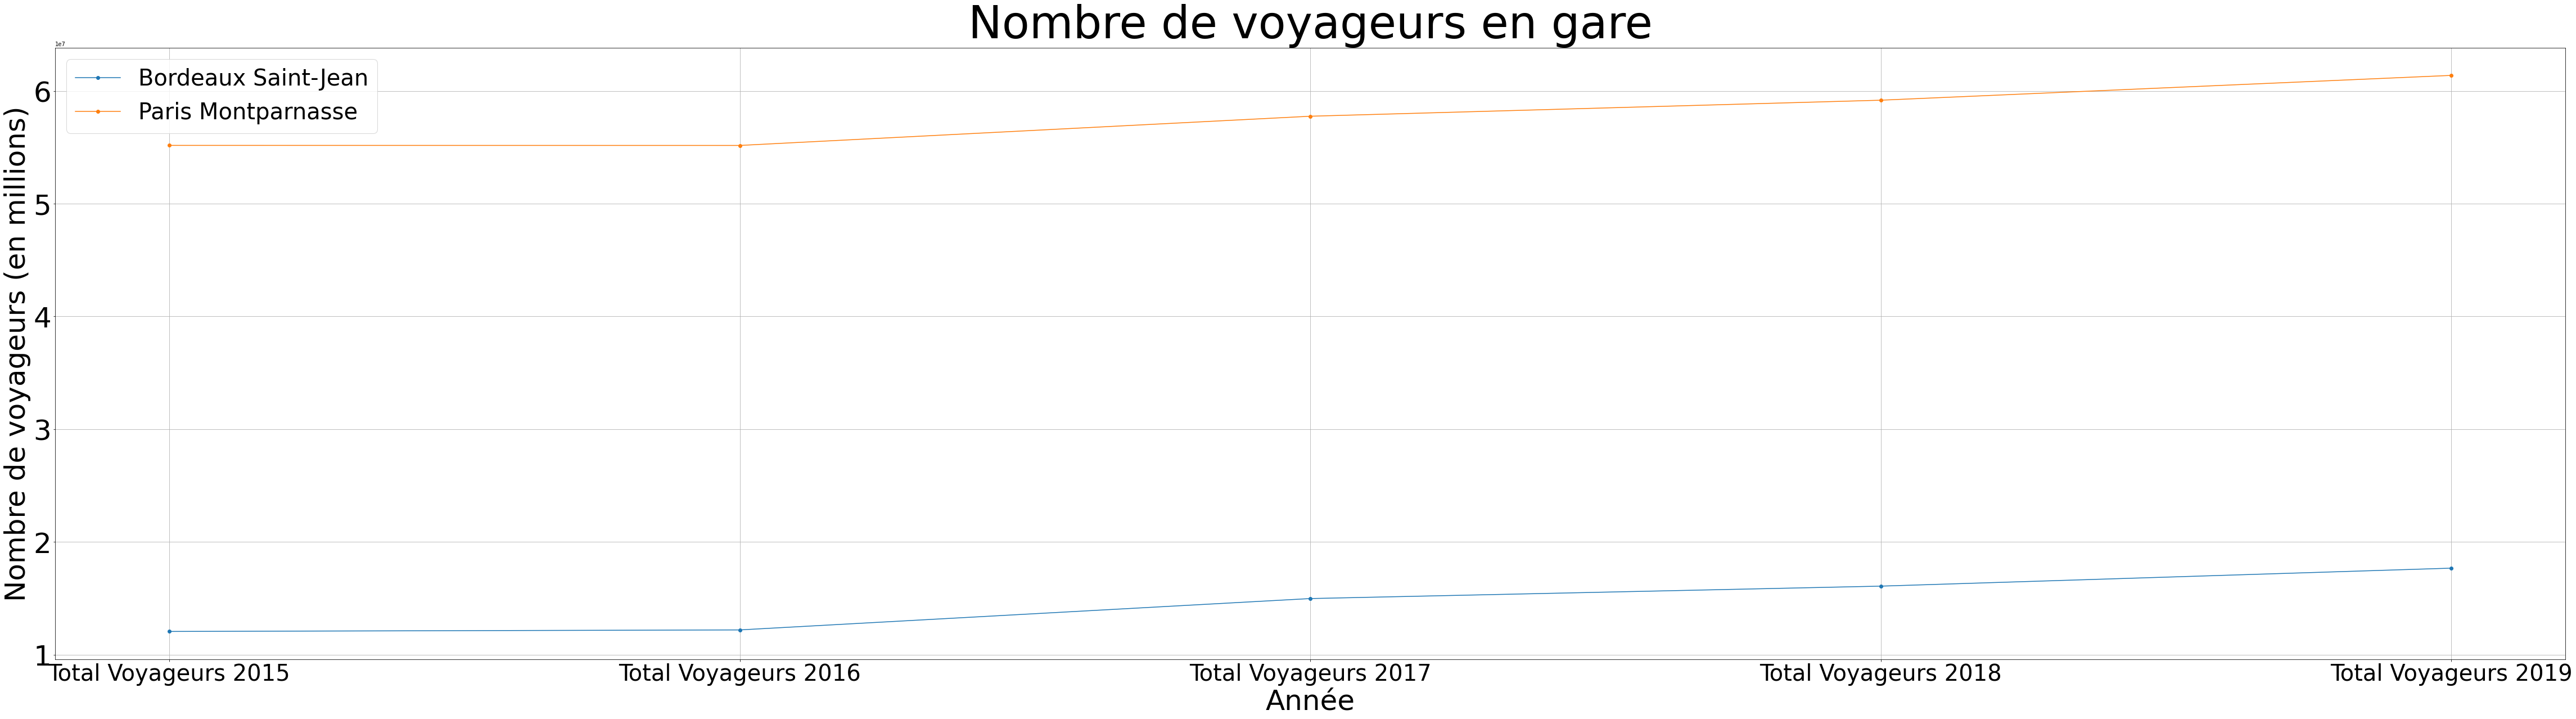

In [11]:
# Nombre de voyageurs en gare
voyageursbordeaux=frequentation_paris_bordeaux.iloc[0,1:6]
voyageursparis=frequentation_paris_bordeaux.iloc[1,1:6]

plt.clf
plt.figure(figsize=(80,20))
plt.plot(voyageursbordeaux,marker='o', label="Bordeaux Saint-Jean")
plt.plot(voyageursparis,marker='o', label="Paris Montparnasse")
plt.title("Nombre de voyageurs en gare",size = 80)
plt.xlabel('Année', size = 50)
plt.ylabel('Nombre de voyageurs (en millions)', size = 50)
plt.xticks(size=40)
plt.yticks(size = 50)
plt.grid() 
plt.legend(loc='best', fontsize=40)
plt.show()

In [12]:
# Effet cumulatif depuis 2015
for i in range(5,10):
  frequentation_paris_bordeaux['Différence 201{}-2015'.format(i)]=frequentation_paris_bordeaux['Total Voyageurs 201{}'.format(i)]-frequentation_paris_bordeaux['Total Voyageurs 2015']
frequentation_paris_bordeaux

,Nom de la gare,Total Voyageurs 2015,Total Voyageurs 2016,Total Voyageurs 2017,Total Voyageurs 2018,Total Voyageurs 2019,Différence 2015-2015,Différence 2016-2015,Différence 2017-2015,Différence 2018-2015,Différence 2019-2015
0,Bordeaux Saint-Jean,12062338,12198403,14979299,16080989,17675655,0,136065,2916961,4018651,5613317
1,Paris Montparnasse,55167519,55162747,57752741,59174531,61374035,0,-4772,2585222,4007012,6206516


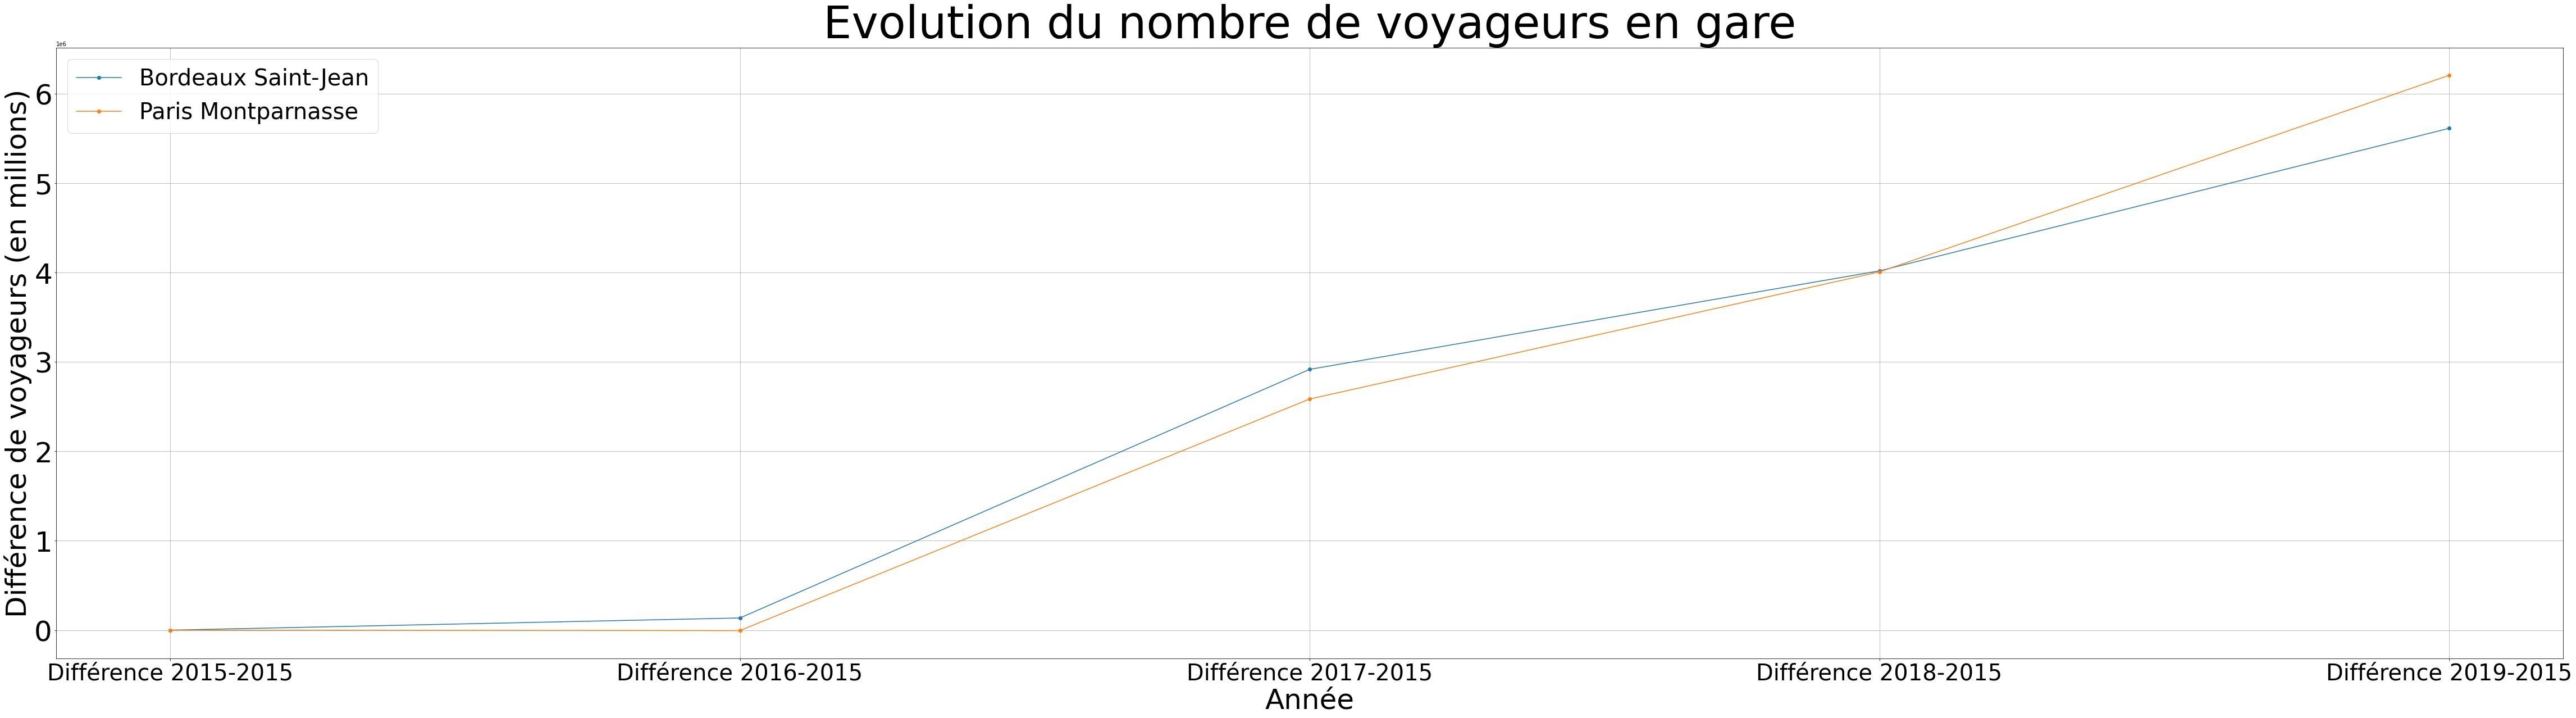

In [13]:
# Evolution du nombre de voyageurs en gare
voyageursbordeaux_cum=frequentation_paris_bordeaux.iloc[0,6:]
voyageursparis_cum=frequentation_paris_bordeaux.iloc[1,6:]
plt.clf
plt.figure(figsize=(80,20))
plt.plot(voyageursbordeaux_cum,marker='o', label="Bordeaux Saint-Jean")
plt.plot(voyageursparis_cum,marker='o', label="Paris Montparnasse")
plt.title("Evolution du nombre de voyageurs en gare",size = 80)
plt.xlabel('Année', size = 50)
plt.ylabel('Différence de voyageurs (en millions)', size = 50)
plt.xticks(size=40)
plt.yticks(size = 50)
plt.grid()
plt.legend(loc='best', fontsize = 40)
plt.show()

Le but de ces graphiques est de montrer la corrélation effective entre le nombre de voyageurs et l'arrivée de la ligne LGV. En effet, ce dernier graphiques montre bien que, quelque soit la gare de départ (Paris Montparnasse ou Bordeaux), il y a une évolution significative  du nombre de voyageur dans les gares, et nous pouvons supposer que cette évolution est en grande partie dûe à une fréquentation la nouvelle ligne LGV.

# II) Analyse du marché immobilier de la commune de Bordeaux entre 2014 et 2019:
<p>Cette section est dédiée à l'analyse des transactions immobilières qui se sont déroulées dans la commune de Bordeaux entre janvier 2014 à juin 2019. Son objectif est de dégager la structure de ces transactions et d'étudier son évolution sur la période considérée en vue potentiellement de déceler un possible effet de l'ouverture de la LGV Sud Europe Atlantique sur celle ci. Pour ce faire, deux jeux de données seront utilisées :
</p>
<ul>
    <li>Données <a href = 'https://www.data.gouv.fr/fr/datasets/demandes-de-valeurs-foncieres-geolocalisees/'>Demandes de valeurs foncières géolocalisées (DVF)</a> qui recense l'ensemble des mutations immobilères s'étant effectuées sur la période considérée;
    </li>
    <li>Données <a href = 'https://www.data.gouv.fr/fr/datasets/quartiers-des-communes-sur-le-territoire-de-bordeaux-metropole/'>Quartiers des communes sur le territoire de Bordeaux Métropole</a> et celles du cadastre, de type géospatiale qui serviront à la cartographie de la commune de bordeaux.
    </li>
</ul>

## 1) Etude du nombre total de transactions :

In [12]:
# Importation des données sur les valeurs immobilières de la Gironde
data_json = pd.DataFrame(requests.get("http://api.cquest.org/dvf?code_commune=33063").json()["resultats"])[[ 
                                      "code_type_local", "type_local", "surface_relle_bati","surface_terrain", "nombre_pieces_principales", 
                                      "section","lon", "lat", 'date_mutation',"valeur_fonciere",'numero_voie','voie','type_voie']]# "code_commune","code_postal"
data_json = data_json[data_json["surface_relle_bati"].notna()][data_json["valeur_fonciere"].notna()]
# Création de la colonne occurence. Les occurences permettent d'étudier les ventes d'appartements par blocs et nous sera utiles pour calculer la variable surface_terrain_effective
g = data_json.groupby(['date_mutation','valeur_fonciere']).date_mutation.count().to_frame('occurence').reset_index() 
# Création de la colonne surface immeuble. La valeur foncière d'un appartment est associée à celle de tout l'immeuble. Cette variable nous permettra donc de calculer plus justemment le prix du m2
h = data_json.groupby(['date_mutation','valeur_fonciere']).surface_relle_bati.sum().to_frame('surface_immeuble').reset_index() 
data_json['surface_terrain'] = data_json['surface_terrain'].fillna(0) # On remplit 
data_json = data_json.merge(g)# Ajout au data frame de la colonne occurence
data_json = data_json.merge(h)# Ajout au data frame de la colonne surface immeuble

data_json['surface_terrain_effective']=data_json['surface_terrain']/data_json['occurence'] #Création de la colonne surface_terrain_effective. Elle rend compte de la surface en plus d'un logement, comme une enceinte d'un immeuble ou un jardin communautaire, en le divisant par le nombre d'appartements en jouissant


# Création de la variable valeur au m2
data_json["valeur_m2"] = data_json["valeur_fonciere"] / (data_json["surface_immeuble"]+data_json["surface_terrain_effective"])
data_json_2 = data_json.copy()

data_json = data_json[data_json['valeur_m2']>1000] #On enlève des valeurs trop hautes
data_json = data_json[data_json['valeur_m2']<7000] #on enlève les valeurs trop basses. Enlever ces valeurs rend plus crédibles les données dvf. On voit mal un prix du m2 à plus de 15 000€ ou à moins de 500 €. Les valeurs ont été choisi arbitrairement de sorte à garder une certaine crédibiité tout en gardant le plus de données possibles.

# Affichage des 7 premières observations
data_json.head(7)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


,code_type_local,type_local,surface_relle_bati,surface_terrain,nombre_pieces_principales,section,lon,lat,date_mutation,valeur_fonciere,numero_voie,voie,type_voie,occurence,surface_immeuble,surface_terrain_effective,valeur_m2
2,2,Appartement,40.0,0.0,2.0,AB,-0.537767,44.867193,2014-02-28,118500.0,200,DE BRAZZA,QUAI,1,40.0,0.0,2962.500000
3,2,Appartement,43.0,0.0,3.0,AB,-0.537767,44.867193,2015-12-17,117500.0,200,DE BRAZZA,QUAI,2,43.0,0.0,2732.558140
4,3,Dépendance,0.0,0.0,0.0,AB,-0.537767,44.867193,2015-12-17,117500.0,200,DE BRAZZA,QUAI,2,43.0,0.0,2732.558140
5,4,Local industriel. commercial ou assimilé,100.0,0.0,0.0,AB,-0.537704,44.867400,2017-06-27,141000.0,202,DE BRAZZA,QUAI,1,100.0,0.0,1410.000000
8,1,Maison,62.0,194.0,2.0,AB,-0.537665,44.867802,2018-04-05,265000.0,205,DE BRAZZA,QUAI,1,62.0,194.0,1035.156250
14,2,Appartement,39.0,0.0,2.0,AE,-0.542496,44.853073,2016-11-16,160000.0,8,ANDRE LAMANDE,RUE,1,39.0,0.0,4102.564103
29,2,Appartement,20.0,208.0,1.0,AE,-0.542303,44.852912,2016-11-30,750000.0,54,DES VIVANTS,RUE,10,253.0,20.8,2739.225712


In [13]:
# Affichage dimensions dataframe
print("(Nb_observations, Nb_colonnes) = ",data_json.shape,'\n')
# Dimensions et Données manquantes 
print("Nombre de valeurs manquantes par variables :\n",data_json.isna().sum())

(Nb_observations, Nb_colonnes) =  (54590, 17) 

Nombre de valeurs manquantes par variables :
 code_type_local                 0
type_local                      0
surface_relle_bati              0
surface_terrain                 0
nombre_pieces_principales       0
section                         0
lon                           570
lat                           570
date_mutation                   0
valeur_fonciere                 0
numero_voie                  1815
voie                            0
type_voie                       2
occurence                       0
surface_immeuble                0
surface_terrain_effective       0
valeur_m2                       0
dtype: int64


In [14]:
# Vérification du type de date_mutation
data_json["date_mutation"].dtypes

dtype('O')

In [15]:
# Formattage en type date
data_json["date_mutation"] = data_json["date_mutation"].astype('datetime64')
data_json["date_mutation"].dtypes

dtype('<M8[ns]')

In [16]:
# Création de la variable year (Année mutation)
data_json["year"] = pd.DatetimeIndex(data_json["date_mutation"]).year
# Nombre de mutations effectués par années
data_json["year"].value_counts().sort_index()

2014     9404
2015     9486
2016    10410
2017    11785
2018     9501
2019     4004
Name: year, dtype: int64

On remarque que le nombre total de mutations enregistré par année n'a cessé d'augmenter entre 2014 et 2017, passant de 12368 à 17614. Au cours de cette période, l'augmentation était assez uniforme (de l'ordre d'environ 100 nouvelles mutations par année) mis à part le passage entre 2016 et 2017 où l'augmentation enregistrée représentait presque le double de celle observée habituellement. Notons que cette année 2017 correspond à l'année de mise en service de la LGV Sud Europe Atlantique reliant Paris à Bordeaux. A la suite de celle-ci, le nombre total de mutations enregistrées à diminué se retrouvant à 14419 en 2018 soit une baisse d'un peu plus de 200 (mutations). Il est cependant à noter que bien que le niveau ait baissé, il reste encore de loin supérieur à celui enregistré en 2012. La valeur observée en 2019 laisse entrevoir que le nombre de mutations a poursuivi sa baisse étant donnée que la valeur obtenue pour le premier semestre de 2019 est de loin inférieur à la moitié de celle de l'année précédente.
### a) Typologie des mutations

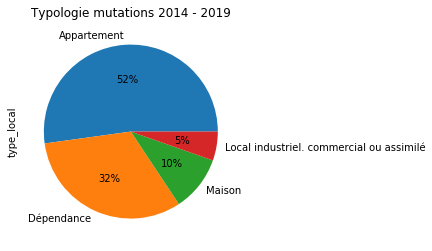

In [17]:
# Diagrammes circulaire sur l'ensemble de la période
data_json["type_local"].value_counts(normalize=True).plot(kind='pie',autopct='%1.0f%%',title = "Typologie mutations 2014 - 2019") 

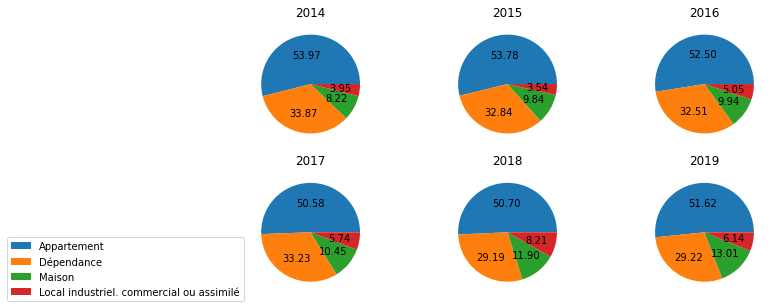

In [18]:
# Diagrammes circulaire sur par année
fig, axes = plt.subplots(2,3, figsize = (10,5))
axes = axes.flatten()
years = list(data_json["year"].sort_values().unique())
for ax, year in zip(axes, years):
    ax.pie(data_json[data_json["year"] == year]["type_local"].value_counts(normalize=True),
           labels=None,
           autopct='%.2f')
    ax.set(ylabel='', title=year, aspect='equal')
axes[3].legend(bbox_to_anchor=(0, 0.5),labels = data_json[data_json["year"] == year]["type_local"].value_counts(normalize=True).index)
plt.show()

Sur la période conidérée, l'ensemble des mutations portaient principalement sur les appartements et les dépendances (respectivement 52% et 32%). Pour les mutations ayant pour objet des maisons, elles ne représentaient que 10% du total enregistré. les locaux industriels, commerciaux ou assimilés n'occupaient quant à eux qu'une part de 13 %. Cette répartition se retrouve approximativement être la même pour l'ensemble des années prises séparement. Ce qui dénote une certaine constance dans la structure des achats de logement au cours d'une année. Cette structure semble ne donc pas avoir grandement été affectée par l'implantation de la LGV en 2017. Il faut cependant noter que bien que cela soit faible, la part de maisons vendues n'a fait qu'augmenter tout au long de la période passant de 8,22% en 2014 à 11,9% en 2018. Elle a même atteint une valeur de 13,01% lors du premier semestre de 2019.

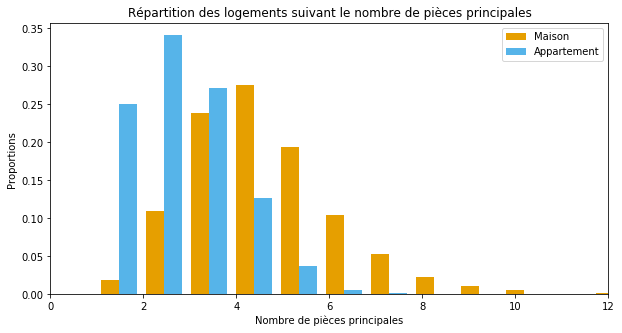

In [19]:
x1 = list(data_json[(data_json["type_local"] == "Maison") & (data_json["nombre_pieces_principales"]>0)]['nombre_pieces_principales'])
x2 = list(data_json[(data_json["type_local"] == "Appartement") & (data_json["nombre_pieces_principales"]>0)]['nombre_pieces_principales'])

colors = ["#E69F00","#56B4E9"]
names = ["Maison","Appartement"]

figure = plt.figure(figsize = (10,5))
axes = figure.add_subplot(111)
plt.hist([x1,x2],bins = 30, density = True, color = colors, label = names)

plt.legend()
axes.set_xlim(0, 12)
plt.xlabel("Nombre de pièces principales")
plt.ylabel("Proportions")
plt.title('Répartition des logements suivant le nombre de pièces principales')
plt.show()

Pour ce qui est de la répartition des logements, on note sans grande surprise que les maisons ayant faits l'objet de mutations comptent plus de pièces que les appartements, bien que la différence ne soit pas très significative. Concernant les appartements, le nombre de pièces principales se retrouvent généralement dans la fourchette de 1 à 3 pièces. En effet, la majeure partie des appartements (environ 35%) comptent 2 pièces. Suivent ensuite respectivement les appartements à 3 et 1 pièces principales qui occupent des parts de 27% et 25%. Le nombre d’appartements comptant 4 pièces ne sont également pas négligeables vu qu’elles représentent 12 % des appartements vendus. Les maisons quant à elles comptent pour la majeure partie (environ 70% d’entre elles) entre 3 et 5 pièces avec une pointe à 4 pièces par logement. La part des maisons comptant plus de 5 logements, bien que pas très conséquente, n’est cependant pas à négliger vu qu’elle représente un peu plus de 19 %.

### b) Localisation des logements :

In [21]:
# Importation de la base de travail
bordeaux_sections = gpd.read_file('https://raw.githubusercontent.com/mdlbm/SNCF-Immobilier/Mats/cadastre-33063-sections.json')
# Affichage des 3 premières observations
bordeaux_sections.shape#head(3)

(390, 7)

In [22]:
# Transformation data_json en fichier geopandas
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt
crs = {'init':'epsg:4326'}
geometry = [Point(i) for i in zip(data_json['lon'],data_json['lat'])]
geo_data_json = gpd.GeoDataFrame(data_json,crs = crs,geometry = geometry)
geo_data_json_2 = geo_data_json.copy()
geo_data_json.head(3)

,code_type_local,type_local,surface_relle_bati,surface_terrain,nombre_pieces_principales,section,lon,lat,date_mutation,valeur_fonciere,numero_voie,voie,type_voie,occurence,surface_immeuble,surface_terrain_effective,valeur_m2,year,geometry
2,2,Appartement,40.0,0.0,2.0,AB,-0.537767,44.867193,2014-02-28,118500.0,200,DE BRAZZA,QUAI,1,40.0,0.0,2962.50000,2014,POINT (-0.53777 44.86719)
3,2,Appartement,43.0,0.0,3.0,AB,-0.537767,44.867193,2015-12-17,117500.0,200,DE BRAZZA,QUAI,2,43.0,0.0,2732.55814,2015,POINT (-0.53777 44.86719)
4,3,Dépendance,0.0,0.0,0.0,AB,-0.537767,44.867193,2015-12-17,117500.0,200,DE BRAZZA,QUAI,2,43.0,0.0,2732.55814,2015,POINT (-0.53777 44.86719)


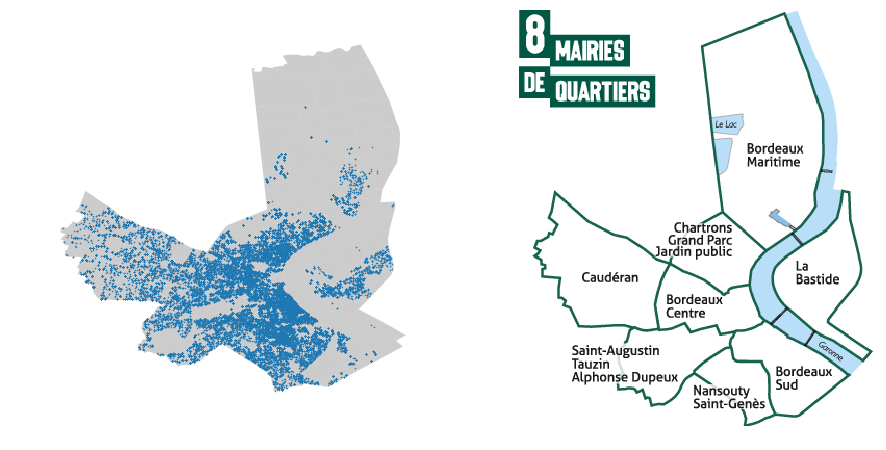

In [35]:
# Localisation des logements dans la commune de bordeaux sur l'ensemble de la période
fig,ax = plt.subplots(1,2,figsize = (15,10))
bordeaux_sections.plot(ax=ax[0], alpha=0.4, color = 'grey')
geo_data_json.plot(ax=ax[0],markersize=0.3)
ax[0].axis('off')
ax[1].axis('off')

import matplotlib.image as mpimg
img = mpimg.imread('http://www.bordeaux.fr/images/ebx/fr/presentationStandard/63938/43/groupePave/155403/pave/347734/imageSpec/596393/image/Bordeaux_quartiers_2020_2_2.png')
imgplot = plt.imshow(img)

plt.show()

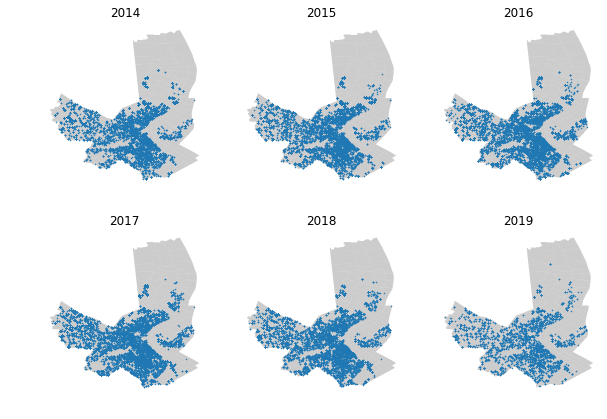

In [24]:
# Diagrammes circulaire sur par année
fig, axes = plt.subplots(2,3, figsize = (10,7))
axes = axes.flatten()
years = list(geo_data_json["year"].sort_values().unique())
for ax, year in zip(axes, years):
    bordeaux_sections.plot(ax=ax, alpha=0.4, color = 'grey')
    geo_data_json[geo_data_json["year"] == year].plot(ax=ax,markersize=0.3)
    ax.set(ylabel='', title=year, aspect='equal')
    ax.axis('off')

Concernant la répartition des mutations dans la commune de Bordeaux, on remarque qu’elles se concentrent principalement dans la partie allant du centre au sud-ouest de la commune. Les quartiers les plus touchés ont été celui de Bordeaux Centre, Chartrons Grand Park Jardin public, Bordeaux Sud, Nansouty Saint-Genès et dans une moindre mesure La bastide et Caudéran. De tous les quartiers, Bordeaux Maritime est le seul qui semble le moins concerné par les opérations d’achats de logements sur l’ensemble de la période. Cet effet de concentration des mutations au centre de la commune ne semble pas avoir varié d’une année à l’autre. Les lieux prisés, en l’occurrence le centre et le sud-ouest de la commune, sont globalement restés inchangés.

In [36]:
# Création Variable cadastre dans geo_data_json par jointure
geo_data_json = geo_data_json[geo_data_json.is_valid]
geo_data_json_2 = geo_data_json.copy()
geo_data_json = gpd.sjoin(geo_data_json, bordeaux_sections,how="inner", op='intersects')
geo_data_json.head(3)

,code_type_local,type_local,surface_relle_bati,surface_terrain,nombre_pieces_principales,section,lon,lat,date_mutation,valeur_fonciere,...,valeur_m2,year,geometry,index_right,id,commune,prefixe,code,created,updated
2,2,Appartement,40.0,0.0,2.0,AB,-0.537767,44.867193,2014-02-28,118500.0,...,2962.50000,2014,POINT (-0.53777 44.86719),0,33063000AB,33063,000,AB,2002-06-07,2014-02-11
3,2,Appartement,43.0,0.0,3.0,AB,-0.537767,44.867193,2015-12-17,117500.0,...,2732.55814,2015,POINT (-0.53777 44.86719),0,33063000AB,33063,000,AB,2002-06-07,2014-02-11
4,3,Dépendance,0.0,0.0,0.0,AB,-0.537767,44.867193,2015-12-17,117500.0,...,2732.55814,2015,POINT (-0.53777 44.86719),0,33063000AB,33063,000,AB,2002-06-07,2014-02-11


In [37]:
# Création de la variable tolal de mutations dans bordeaux_sections
merge = geo_data_json.groupby("code")['code'].count().to_frame('nb_tot').reset_index()
bordeaux_sections = bordeaux_sections.merge(merge, how = "left", on = "code" )
bordeaux_sections.head(3)
#merge

,id,commune,prefixe,code,created,updated,geometry,nb_tot
0,33063000AB,33063,000,AB,2002-06-07,2014-02-11,"MULTIPOLYGON (((-0.53689 44.86842, -0.53689 44...",5.0
1,33063000AC,33063,000,AC,2002-06-07,2014-02-11,"MULTIPOLYGON (((-0.53766 44.86369, -0.53801 44...",NaN
2,33063000AD,33063,000,AD,2002-06-07,2014-02-11,"MULTIPOLYGON (((-0.54329 44.85308, -0.54326 44...",NaN


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\colors.py:512: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


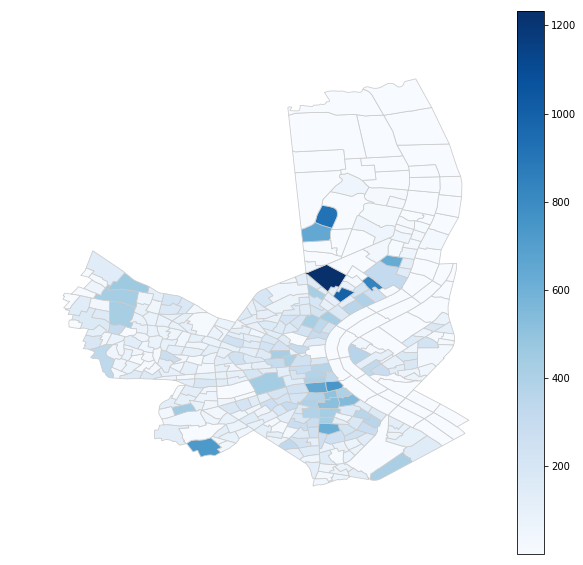

In [38]:
# Choropleth nb mutations
def cloropleth(data,variable,size ="",title = '',ax =""):
    vmax = data[variable].max()
    vmin = data[variable].min()

    if ax == "":
        fig1,ax = plt.subplots()
        
    else:
        fig1 = plt.figure(1)
    bordeaux_sections.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')
    ax.axis('off')
    if size != "":
        fig1.set_figheight(size[0])
        fig1.set_figwidth(size[1])
    ax.set_title(title, fontdict={'fontsize': '15', 'fontweight' : '3'})
    
    sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
    sm._A = []
    cbar = fig1.colorbar(sm,ax=ax)

cloropleth(bordeaux_sections,"nb_tot",size = (10,10))

In [39]:
# Total mutation par année
bordeaux_sections.sort_values("nb_tot",ascending=False)[["code","nb_tot"]].head(5)

,code,nb_tot
301,RM,1233.0
303,RO,994.0
337,TH,919.0
310,RX,840.0
135,HE,743.0


Comme les figures précédentes l'ont laissé entrevoir, on remarque que ce sont dans les quartiers du centre que l'on a enregistré le plus de transactions immobilières. En faisant l'analyse en termes de sections du cadastre, on voit cependant que c'est la section RM se situant dans le quartier de Bordeaux Maritime qui a globalement enregistré le plus de mutations. Il en est de même des 3 sections qui suivent. Elles sont toutes localisées au niveau de Bordeaux Maritime. Des 5 sections ayant enregistrées le plus de mutations, seule la section HE se trouve en dehors de ce quartier. Elle se retrouve plus précisément à la frontière entre Bordeaux centre et Bordeaux Sud. Ceci met en évidence qu'en dépit du fait que la grande majorité des mutations se soient faites au centre et au sud de la commune, Il existe des zones très attractives du nord où le marché de l'immobilier est très actif.

In [40]:
# Création de la variable tolal de mutations dans bordeaux_sections pour chaque années
for year in years :
    merge = geo_data_json[geo_data_json["year"]==year].groupby("code")['code'].count().to_frame('nb_tot_'+str(year)).reset_index()
    bordeaux_sections = bordeaux_sections.merge(merge, how = "left", on = "code" )
bordeaux_sections.head(3)

,id,commune,prefixe,code,created,updated,geometry,nb_tot,nb_tot_2014,nb_tot_2015,nb_tot_2016,nb_tot_2017,nb_tot_2018,nb_tot_2019
0,33063000AB,33063,000,AB,2002-06-07,2014-02-11,"MULTIPOLYGON (((-0.53689 44.86842, -0.53689 44...",5.0,1.0,2.0,NaN,1.0,1.0,NaN
1,33063000AC,33063,000,AC,2002-06-07,2014-02-11,"MULTIPOLYGON (((-0.53766 44.86369, -0.53801 44...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,33063000AD,33063,000,AD,2002-06-07,2014-02-11,"MULTIPOLYGON (((-0.54329 44.85308, -0.54326 44...",NaN,NaN,NaN,NaN,NaN,NaN,NaN


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\colors.py:512: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\colors.py:512: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\colors.py:512: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\colors.py:512: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\colors.py:512: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\colors.py:512: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


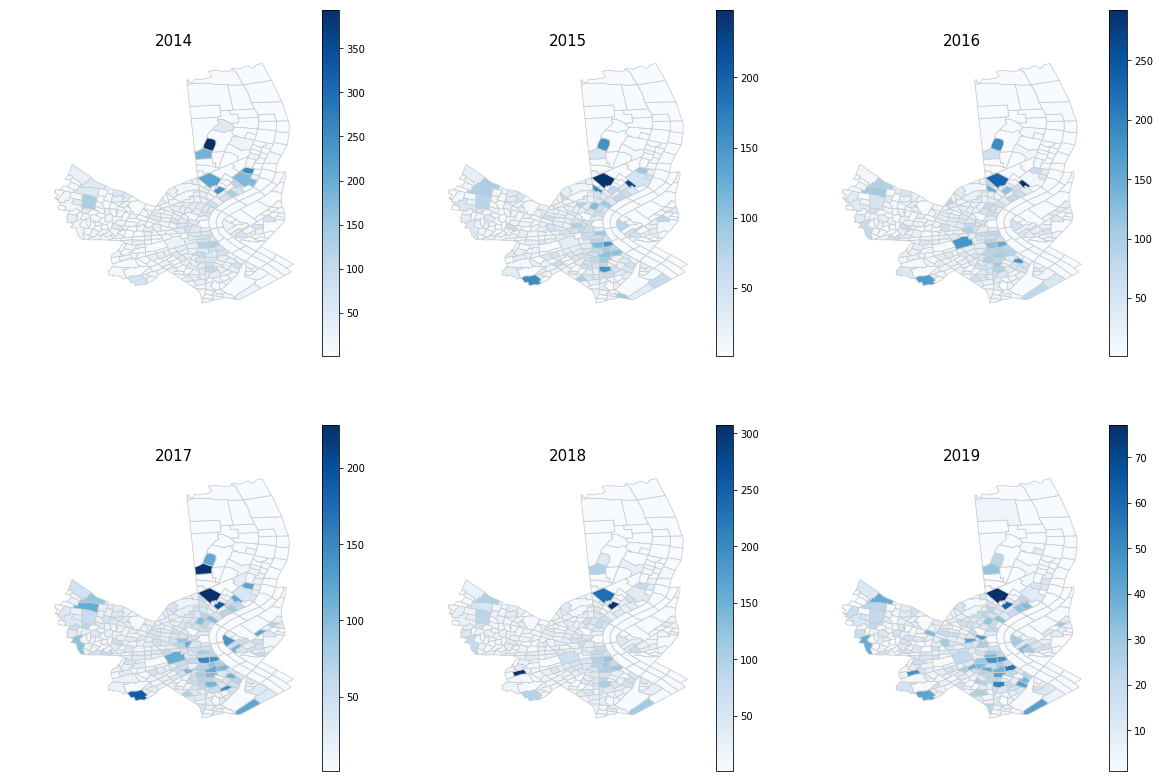

In [41]:
# Choropleth nb mutations par années
fig, axes = plt.subplots(2,3, figsize = (20,14))
axes = axes.flatten()
for ax, year in zip(axes, years) :
    cloropleth(bordeaux_sections,"nb_tot_"+str(year),ax=ax,title=year)

In [33]:
# Sections cadastres enregistrant le plus de mutations par année
for year in years :
    print("Année ",year," :\n",
          bordeaux_sections.sort_values("nb_tot_"+str(year),ascending=False)[["code","nb_tot_"+str(year)]].head(3),
          '\n\n')

Année  2014  :
     code  nb_tot_2014
337   TH        393.0
316   SD        256.0
303   RO        244.0 


Année  2015  :
     code  nb_tot_2015
301   RM        248.0
310   RX        227.0
154   ID        160.0 


Année  2016  :
     code  nb_tot_2016
310   RX        292.0
301   RM        232.0
337   TH        188.0 


Année  2017  :
     code  nb_tot_2017
301   RM        228.0
334   TC        225.0
303   RO        194.0 


Année  2018  :
     code  nb_tot_2018
161   IO        307.0
303   RO        305.0
301   RM        233.0 


Année  2019  :
     code  nb_tot_2019
301   RM         77.0
303   RO         62.0
72    DN         57.0 




Ces graphiques montrent que malgré les changements qu'il peut y avoir d'une année à l'autre, certaines zones restent toujours prisées par les acheteurs. Dans le cas de la commune de Bordeaux, il s'agit par exemple des sections RM, RX et RO du quartier de Bordeaux Maritime qui sont au fil des années restées tendances.

## 2) Etude du prix du m²

On étudie ici le prix moyen du m² des **logmements** à Bordeaux

In [42]:
# Données avec surface renseignée (appartements et maisons)
data_json = data_json[(data_json['type_local']=='Appartement')|(data_json['type_local']=='Maison')]

In [43]:
# Aperçu des données
data_json.sort_values("valeur_m2", ascending = False).sample(7)

,code_type_local,type_local,surface_relle_bati,surface_terrain,nombre_pieces_principales,section,lon,lat,date_mutation,valeur_fonciere,numero_voie,voie,type_voie,occurence,surface_immeuble,surface_terrain_effective,valeur_m2,year,geometry
4167,2,Appartement,45.0,0.0,3.0,BT,NaN,NaN,2018-10-17,700000.0,2,DESPIN,RUE,6,264.0,0.0,2651.515152,2018,POINT (nan nan)
35513,1,Maison,273.0,205.0,8.0,LV,-0.592197,44.844760,2016-06-10,780000.0,109,JEAN SOULA,RUE,1,273.0,205.0,1631.799163,2016,POINT (-0.592 44.845)
10613,2,Appartement,28.0,0.0,2.0,DC,-0.571671,44.829970,2015-08-26,106000.0,9,TIFFONET,RUE,1,28.0,0.0,3785.714286,2015,POINT (-0.572 44.830)
24676,2,Appartement,25.0,0.0,1.0,HY,-0.593952,44.822943,2017-12-27,100000.0,15,DU CAULET,RUE,2,50.0,0.0,2000.000000,2017,POINT (-0.594 44.823)
45741,2,Appartement,71.0,0.0,3.0,PM,-0.574544,44.852705,2015-07-07,120000.0,19,FRERE,RUE,1,71.0,0.0,1690.140845,2015,POINT (-0.575 44.853)
44116,2,Appartement,131.0,0.0,4.0,PE,-0.578131,44.847082,2017-07-03,860000.0,2,DU CHAMP DE MARS,PL,1,131.0,0.0,6564.885496,2017,POINT (-0.578 44.847)
19131,1,Maison,55.0,85.0,3.0,EU,-0.585129,44.826162,2018-06-14,470000.0,7,DES TREUILS,RUE,1,55.0,85.0,3357.142857,2018,POINT (-0.585 44.826)


In [44]:
bordeaux_sections = gpd.read_file('https://raw.githubusercontent.com/mdlbm/SNCF-Immobilier/Mats/cadastre-33063-sections.json') #Importation des sections cadastrale de Bordeaux
bordeaux_sections=bordeaux_sections.rename(columns={'code':'section'}) # Renommage de la colonne code en section pour permettre la fusion par section cadastrale
valeurs_m2_agg = data_json[["section","valeur_m2"]].groupby('section').mean().reset_index() #Création d'une data frame regroupant la moyenne de la valeur au m2 par section cadastrale

bordeaux_sections.merge(valeurs_m2_agg).sample(7) #Fusion des sections cadastrales

,id,commune,prefixe,section,created,updated,geometry,valeur_m2
244,33063000PI,33063,000,PI,2002-06-12,2014-02-11,"MULTIPOLYGON (((-0.57667 44.84715, -0.57511 44...",4088.458322
165,33063000LK,33063,000,LK,2002-06-11,2014-02-11,"MULTIPOLYGON (((-0.59047 44.85173, -0.59093 44...",2865.072281
23,33063000BI,33063,000,BI,2002-06-07,2014-02-11,"MULTIPOLYGON (((-0.55020 44.84081, -0.54969 44...",2418.446496
97,33063000EY,33063,000,EY,2002-06-10,2014-02-11,"MULTIPOLYGON (((-0.58601 44.82747, -0.58394 44...",2628.387390
299,33063000TK,33063,000,TK,2002-06-13,2014-02-11,"MULTIPOLYGON (((-0.55105 44.88505, -0.55094 44...",1822.166014
295,33063000SZ,33063,000,SZ,2002-06-13,2014-02-11,"MULTIPOLYGON (((-0.57345 44.86890, -0.57397 44...",2847.244387
330,33063000YO,33063,000,YO,2002-06-13,2014-02-11,"MULTIPOLYGON (((-0.62661 44.85332, -0.62663 44...",3051.271000


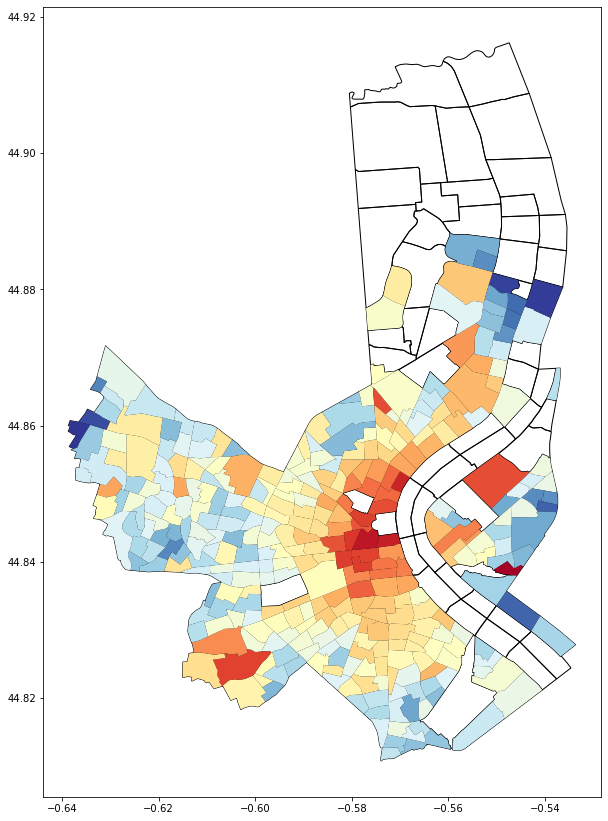

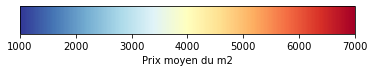

In [37]:
#Affichage d'une heatmap fonction du prix moyen du m2 à Bordeaux sur la période 2015-2019
base = bordeaux_sections.plot(edgecolor = 'black', figsize = (10,20), facecolor = 'none')
bordeaux_sections.merge(valeurs_m2_agg).plot(column='valeur_m2',cmap = 'RdYlBu_r', ax=base)
#Création de la légende
fig, ax = plt.subplots(figsize=(6, 1))
fig.subplots_adjust(bottom=0.5)
cmap = mpl.cm.RdYlBu_r
norm = mpl.colors.Normalize(vmin=1000, vmax=7000)

fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),cax=ax, orientation='horizontal', label="Prix moyen du m2")


On voit ici que les logements les plus chers sont, bien évidemment, situé au centre de la métropole.

In [45]:
valeurs_m2_année = data_json.groupby(['year','section']).valeur_m2.mean().to_frame('moyenne_m2').reset_index() #On regroupe le prix moyen du m2 par année et par section cadastrale

In [46]:
valeurs_m2_année=valeurs_m2_année.pivot(index='section', columns='year', values='moyenne_m2') # Le data frame est modifié pour laisser voir un tableau à double entrée qui donne pour une section cadastrale et et une année données le prix moyen du m2 s'il y a eu de transaction. 
valeurs_m2_année.head(5)

year,2014,2015,2016,2017,2018,2019
section,,,,,,
AB,2962.500000,2732.558140,NaN,NaN,1035.156250,NaN
AE,2544.394299,2928.699489,2542.133928,2814.564622,2330.589893,3215.899326
AF,NaN,NaN,NaN,4090.163934,NaN,NaN
AH,1595.134469,2343.440008,2266.530865,2514.109321,2430.371726,2975.612971
AI,1522.081871,3681.934726,1989.040480,3468.919417,1837.040725,1664.045319


In [47]:
a=valeurs_m2_année.transpose().pct_change().transpose() # Calcul du taux d'évolution du prix moyen du m2 par année et par section cadastrale
a.head(5)

year,2014,2015,2016,2017,2018,2019
section,,,,,,
AB,NaN,-0.077618,0.000000,0.000000,-0.621177,0.000000
AE,NaN,0.151040,-0.131992,0.107166,-0.171954,0.379865
AF,NaN,NaN,NaN,NaN,0.000000,0.000000
AH,NaN,0.469118,-0.032819,0.109232,-0.033307,0.224345
AI,NaN,1.419012,-0.459784,0.744017,-0.470429,-0.094171


In [48]:
b = a.replace(np.NaN, 0.)[[2015,2016,2017,2018,2019]]#Remplacement des valeurs NaN par 0 
b.head(5)

year,2015,2016,2017,2018,2019
section,,,,,
AB,-0.077618,0.000000,0.000000,-0.621177,0.000000
AE,0.151040,-0.131992,0.107166,-0.171954,0.379865
AF,0.000000,0.000000,0.000000,0.000000,0.000000
AH,0.469118,-0.032819,0.109232,-0.033307,0.224345
AI,1.419012,-0.459784,0.744017,-0.470429,-0.094171


In [50]:
#Ce code nous permettra de dégager une évolution moyenne plus précise dans les zones où des mutations n'ont pas eu lieu les premières ou les dernières années
for i in b.index:
    c=2015
    while c<2020 and b[c][i] == 0:
        b[c][i] = np.NaN
        c=c+1
        
    c=2019
    while c>2014 and b[c][i] == 0:
        b[c][i] = np.NaN
        c=c-1         
b.sample(7)

year,2015,2016,2017,2018,2019
section,,,,,
NO,NaN,0.320483,0.319883,-0.431075,NaN
NP,-0.055474,-0.102329,0.362155,-0.451358,NaN
AF,NaN,NaN,NaN,NaN,NaN
PB,-0.047150,0.160420,0.187014,-0.112675,0.292025
DB,-0.138661,0.147330,0.089995,0.094372,0.239908
RL,0.081769,-0.090370,-0.121744,0.287359,0.117637
MZ,NaN,1.129212,-0.368907,0.700991,-0.120505


In [51]:
taux_moyen=b.mean(axis=1).to_frame('taux_moyen').reset_index() #Calcul du taux du taux moyen d'évolution du prix du m2 par section cadastrale
taux_moyen.sort_values('taux_moyen', ascending=False).head(5)

,section,taux_moyen
284,SE,1.092226
125,IE,0.971494
26,BM,0.765732
163,LH,0.424997
98,GL,0.349240


In [52]:
taux_moyen.sort_values('taux_moyen', ascending=True).head(5)

,section,taux_moyen
279,RZ,-0.522121
276,RW,-0.495808
28,BP,-0.393930
18,BA,-0.181492
0,AB,-0.174699


In [53]:
taux_moyen=taux_moyen[taux_moyen['taux_moyen']<0.3] #On enlève les valeurs trop hautes (9 valeurs)
taux_moyen=taux_moyen[taux_moyen['taux_moyen']>-0.2] #On enlève les valeurs trop basses (3 valeurs)
taux_moyen=taux_moyen.fillna(0) # ON remplace les valeurs NaN par 0 si besoin est.
#Ces opérations rendent mieux comptent de l'évolution moyenne pour la majorité des cadastres sur le heatmap suivant

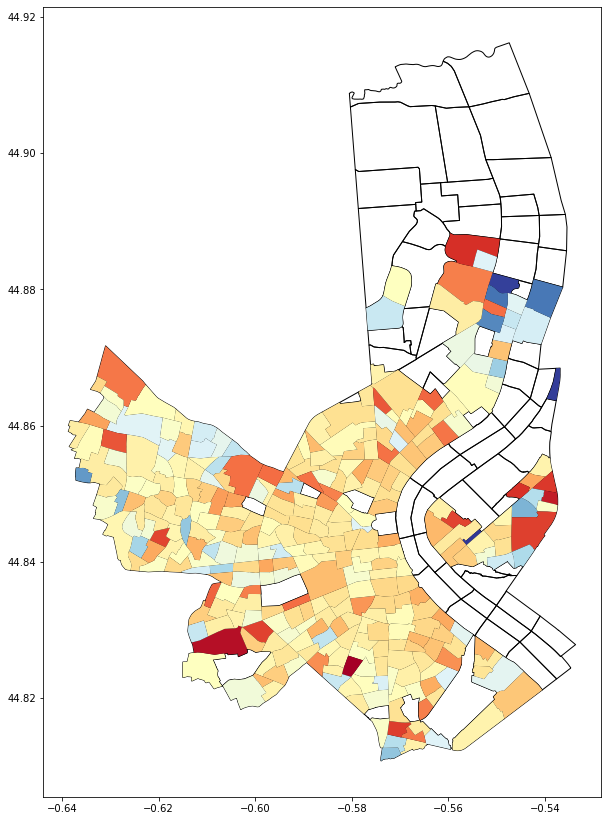

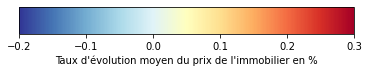

In [46]:
base = bordeaux_sections.plot(edgecolor = 'black', figsize = (10,20), facecolor = 'none') #Fond de carte de cadastre de Bordeaux
a= bordeaux_sections.merge(taux_moyen).plot(column='taux_moyen',cmap = 'RdYlBu_r', ax=base ) #Heatmap de l'évolution des prix du m2
#Création de la légende
fig, ax = plt.subplots(figsize=(6, 1))
fig.subplots_adjust(bottom=0.5)
cmap = mpl.cm.RdYlBu_r
norm = mpl.colors.Normalize(vmin=-0.2, vmax=0.3)

fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
             cax=ax, orientation='horizontal', label="Taux d'évolution moyen du prix de l'immobilier en %")

In [54]:
prix_m2_annee = data_json.groupby('year').mean().reset_index()
prix_m2_annee=prix_m2_annee[['year','valeur_m2']]

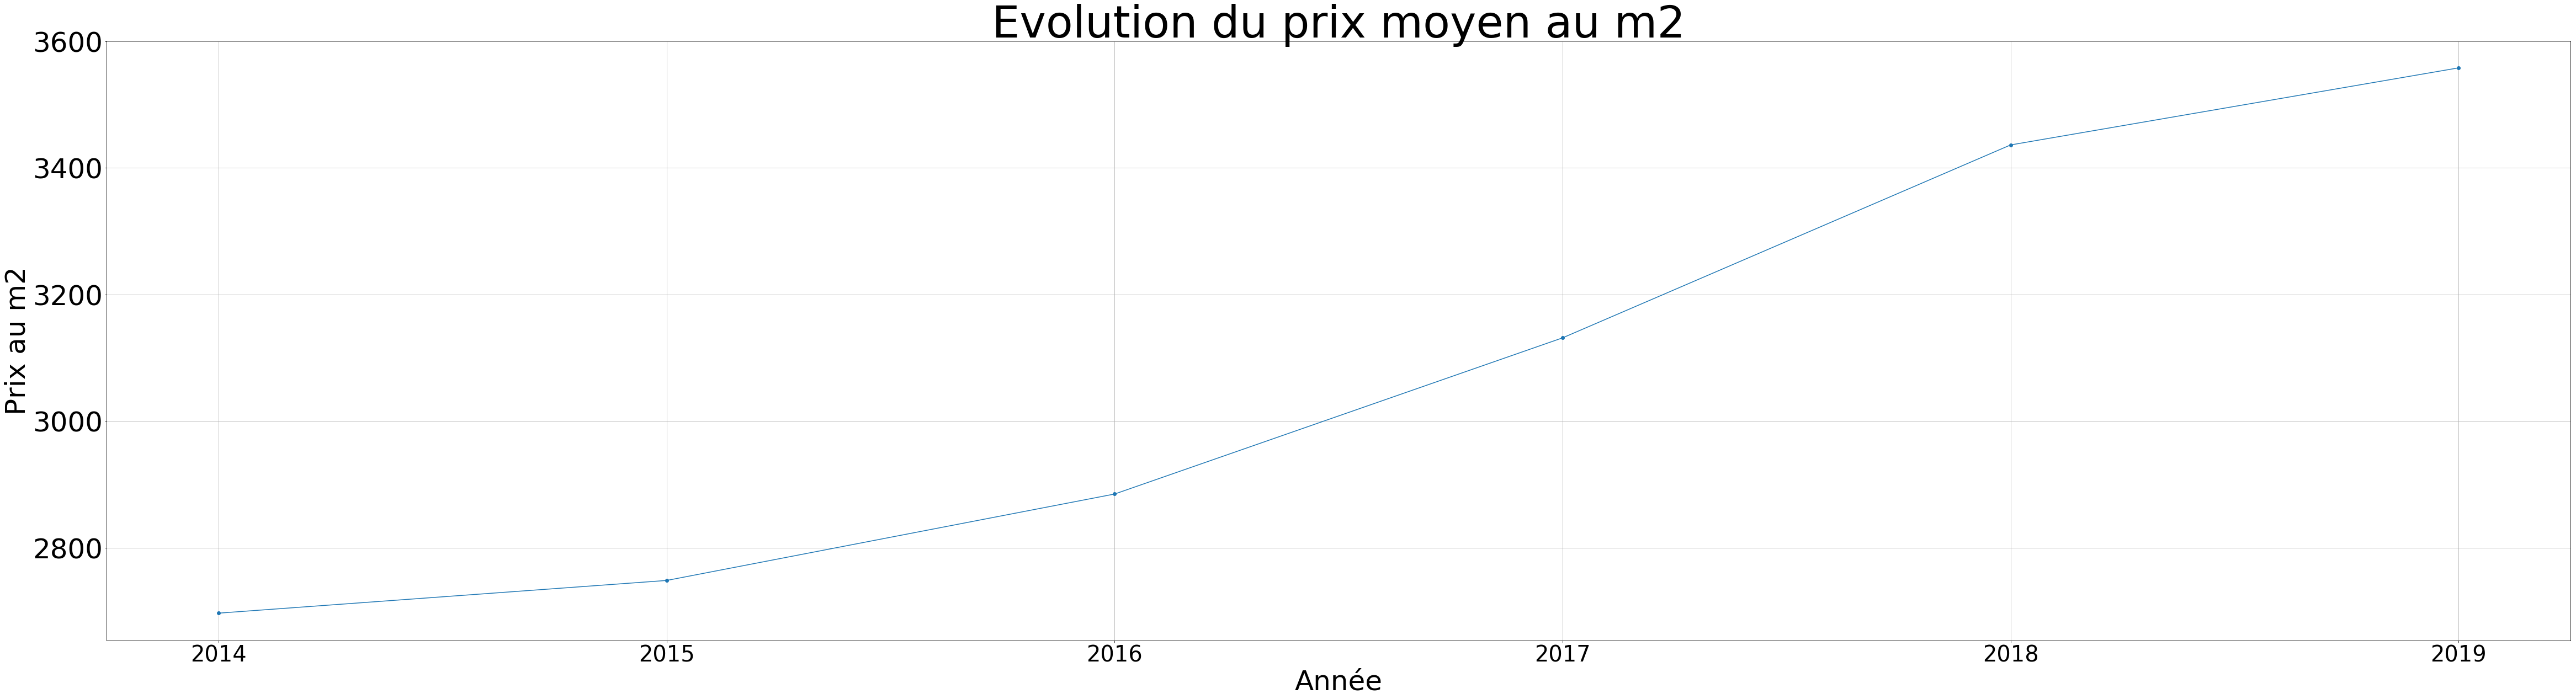

In [55]:
plt.clf
plt.figure(figsize=(80,20))
plt.plot(prix_m2_annee['year'], prix_m2_annee['valeur_m2'],marker='o')

plt.title("Evolution du prix moyen au m2",size = 80)
plt.xlabel('Année', size = 50)
plt.ylabel('Prix au m2', size = 50)
plt.xticks(size=40)
plt.yticks(size = 50)
plt.grid()

In [56]:
# Variable distance par rapport à la gare de Bordeaux
from numpy import sin, cos, sqrt, arctan2, radians
data_json["distance_gare"] = (sin((radians(data_json["lat"])-radians(44.821996712))/2)**2 + cos(radians(data_json["lat"]))*cos(radians(44.821996712))*sin((radians(data_json["lon"])-radians(-0.55333112))/2)**2)
data_json["distance_gare"] = 2 * arctan2(sqrt(data_json["distance_gare"]), sqrt(1 - data_json["distance_gare"])) * 6373
# Les mutations les plus proches de la gare
data_json[['distance_gare','numero_voie',"voie",'type_voie']].sort_values("distance_gare",ascending=False).head(7)

,distance_gare,numero_voie,voie,type_voie
62979,7.990323,11,ARAGO,ALL
62975,7.990323,13,ARAGO,ALL
62942,7.990323,15,ARAGO,ALL
62946,7.990323,11,ARAGO,ALL
62948,7.990323,11,ARAGO,ALL
62953,7.990323,13,ARAGO,ALL
62955,7.990323,13,ARAGO,ALL


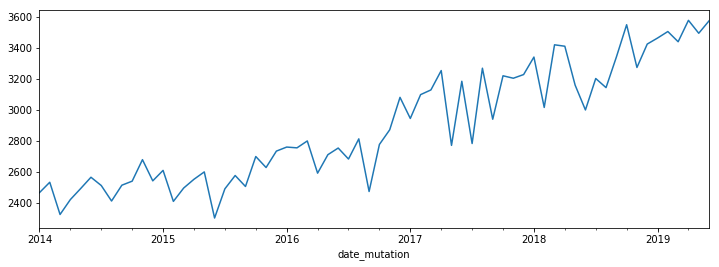

In [57]:
# Données sur un rayon de 2 km
rayon = 2
data_rayon = data_json[data_json["distance_gare"] <= rayon][["date_mutation",'valeur_m2']].sort_values("date_mutation")

data_rayon["date_mutation"] = data_rayon["date_mutation"].astype('datetime64')
donnee_temporelle = data_rayon.groupby(data_rayon['date_mutation'].dt.to_period("M"))['valeur_m2'].mean()

donnee_temporelle.plot(figsize=(12,4))

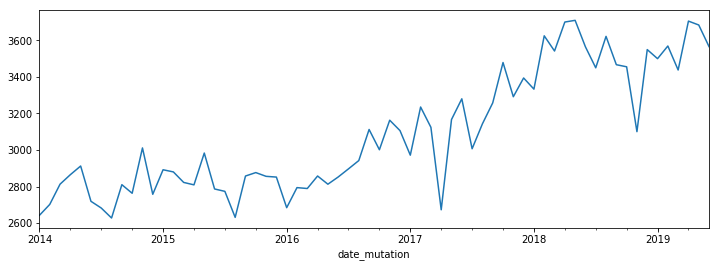

In [59]:
# Prix logements situés à plus de 2 km de la gare
data_rayon = data_json[data_json["distance_gare"] > rayon][["date_mutation",'valeur_m2']].sort_values("date_mutation")

data_rayon["date_mutation"] = data_rayon["date_mutation"].astype('datetime64')
donnee_temporelle = data_rayon.groupby(data_rayon['date_mutation'].dt.to_period("M"))['valeur_m2'].mean()

donnee_temporelle.plot(figsize=(12,4))

Comme vu précédemment, le prix de l'immobilier n'a cessé d'augmenter sur la période 2014 - 2019. Il semble en effet y avoir eu un effet "ouverture de la LGV" qui a eu tendance à tirer les prix à la hausse. Ceci pourrait pousser à se demander si cet effet était juste localisé dans les quartiers avoisinant la gare ou s'il était beaucoup plus général. En examinant les deux dernières figures, on constate que la hausse des prix ne s'est pas uniquement concentrée sur les quartiers proches de la Gare de Bordeaux Saint-Jean (sur un rayon de 2 km), elle a également affecté l'ensemble de logements de la commune. On voit également à l'aide des graphiques que la hausse s'est accélérée vers la fin de l'année 2017 pour l'ensemble des logements de la commune de Bordeaux.

# 3 ) Modélisation du prix au centre ville de Bordeaux

In [76]:
# Chargement données quartiers
bordeaux_quartiers = gpd.read_file('https://raw.githubusercontent.com/mdlbm/SNCF-Immobilier/master/se_quart_s.json')
bordeaux_quartiers.head()

,valide,insee,geom_err,nom,quarpoli,cdate,gid,mdate,geometry
0,1,33318,None,Toctoucau,1,2016-03-31T19:45:28,135.0,2016-12-02T10:36:56,"POLYGON ((-0.72364 44.78064, -0.72357 44.78069..."
1,1,33318,None,3M-Bourgailh,1,2016-03-31T19:45:28,116.0,2016-12-02T10:36:36,"POLYGON ((-0.67911 44.80185, -0.67969 44.80188..."
2,1,33318,None,Saige,1,2016-03-31T19:45:28,112.0,2016-12-02T10:36:28,"POLYGON ((-0.62840 44.78518, -0.62856 44.78511..."
3,1,33318,None,Casino,1,2016-03-31T19:45:28,114.0,2016-12-02T10:36:00,"POLYGON ((-0.62804 44.80689, -0.62945 44.80649..."
4,1,33281,None,Arlac,1,2016-03-31T19:45:28,115.0,2017-06-13T10:59:28,"POLYGON ((-0.62901 44.81440, -0.62908 44.81440..."


In [77]:
geo_data_json_2 = geo_data_json_2[geo_data_json_2.is_valid]
valeurs_quartiers = gpd.sjoin(geo_data_json_2,bordeaux_quartiers, how = 'inner', op='intersects')
valeurs_quartiers = valeurs_quartiers.drop(columns=['valide','insee','geom_err','quarpoli','cdate','mdate'])
for i in ['Maison','Appartement', 'Dépendance','Local industriel. commercial ou assimilé']:
    valeurs_quartiers['{}'.format(i)]= valeurs_quartiers['type_local']==i
    valeurs_quartiers['{}'.format(i)]= valeurs_quartiers['{}'.format(i)].astype(int)
valeurs_quartiers = valeurs_quartiers.rename(columns={'Local industriel. commercial ou assimilé':'Local'})
valeurs_quartiers['trans_nb_pieces'] = valeurs_quartiers['nombre_pieces_principales']**1.9
valeurs_quartiers.sort_values('valeur_m2').head()

,code_type_local,type_local,surface_relle_bati,surface_terrain,nombre_pieces_principales,section,lon,lat,date_mutation,valeur_fonciere,...,year,geometry,index_right,nom,gid,Maison,Appartement,Dépendance,Local,trans_nb_pieces
46,1,Maison,71.0,154.0,2.0,AE,-0.539600,44.854550,2015-12-17,225115.00,...,2015,POINT (-0.53960 44.85455),11,La Bastide,101.0,1,0,0,0,3.732132
55211,2,Appartement,70.0,0.0,3.0,SA,-0.550911,44.864718,2014-01-20,783989.53,...,2014,POINT (-0.55091 44.86472),17,Bordeaux Maritime,122.0,0,1,0,0,8.063626
55210,2,Appartement,63.0,0.0,3.0,SA,-0.550911,44.864718,2014-01-20,783989.53,...,2014,POINT (-0.55091 44.86472),17,Bordeaux Maritime,122.0,0,1,0,0,8.063626
55209,3,Dépendance,0.0,0.0,0.0,SA,-0.550911,44.864718,2014-01-20,783989.53,...,2014,POINT (-0.55091 44.86472),17,Bordeaux Maritime,122.0,0,0,1,0,0.000000
55194,3,Dépendance,0.0,0.0,0.0,SA,-0.550911,44.864718,2014-01-20,783989.53,...,2014,POINT (-0.55091 44.86472),17,Bordeaux Maritime,122.0,0,0,1,0,0.000000


In [83]:
centre_ville = valeurs_quartiers[valeurs_quartiers['gid']==83.0]#Il y a deux quartiers centre-ville, celui de Bordeaux est associé à un gid = 83.0

In [84]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
regression_cv = centre_ville[centre_ville["surface_terrain_effective"]>0][['valeur_m2','valeur_fonciere', 'surface_relle_bati','surface_terrain_effective','Maison', 'Appartement', 'Dépendance','year']].astype(np.float64)
regression_cv.head()

,valeur_m2,valeur_fonciere,surface_relle_bati,surface_terrain_effective,Maison,Appartement,Dépendance,year
635,1553.509781,270000.0,38.0,22.8,0.0,1.0,0.0,2017.0
636,1553.509781,270000.0,0.0,22.8,0.0,0.0,1.0,2017.0
637,1553.509781,270000.0,47.0,22.8,0.0,1.0,0.0,2017.0
1993,1375.245580,350000.0,100.0,53.5,1.0,0.0,0.0,2015.0
3624,1046.755059,300000.0,115.0,33.6,1.0,0.0,0.0,2017.0


In [101]:
results = sm.RLM(regression_cv[['valeur_m2']], regression_cv.drop(['valeur_m2','valeur_fonciere','year'], axis = 1),M=sm.robust.norms.LeastSquares()).fit()

print(results.summary())

                    Robust linear Model Regression Results                    
Dep. Variable:              valeur_m2   No. Observations:                 2375
Model:                            RLM   Df Residuals:                     2370
Method:                          IRLS   Df Model:                            4
Norm:                    LeastSquares                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Tue, 15 Dec 2020                                         
Time:                        16:44:59                                         
No. Iterations:                     2                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
surface_relle_bati    

In [102]:
# F test
A = np.identity(len(results.params))
A = A[1:,:]
print(results.f_test(A))

<F test: F=array([[1483.59978228]]), p=0.0, df_denom=2370, df_num=4>


In [103]:
# R2
sm.OLS(regression_cv[['valeur_m2']], regression_cv.drop(['valeur_m2','valeur_fonciere','year'], axis = 1)).fit().rsquared

0.7535033201611693

Modèle obtenu en effectuant la régression linéaire du prix au mètre carré sur les variables surface réelle, surface terrain et type local donnent des résultats assez satisfaisants. En effet, avec un $R^{2}$ de 0.7535, le modèle prédit 75% de la variabilité du prix au $m^2$ dans le centre-ville. Pour ce qui est de la significativité des coefficients, l'ensemble des variables considérée sont significatives aux différents seuils usuels et plus particulièrement au seuil de 1%. Le test de significativité globale des coefficients rejette également la nullité de ces derniers avec une valeur critique quasi nulle. Le modèle prédit qu'une augmentation $1 m^2$ de la surface du bâtiment, les autres variables restants fixes, augmente le prix prédit du $m^2$ au centre-ville d'environ 2 euros. S'agissant des modalités de la variable qualitative type de local, l'interprétation se fait en tenant en compte le fait que la modalité 'Local industriel. Commercial ou assimilé' ait été prise comme modalité de référence. Ainsi pour la modalité Maison, on dira que le modèle prédit qu'en moyenne, les maisons coutent 2065 que les locaux industriels, toutes choses égales par ailleurs.